In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hydroeval as he
import seaborn as sns
import pandas as pd



In [2]:
y_npy = np.load('/lustre/gpu-lustre/code/Input/y_array_4_years_utc.npy')

bc_mean = np.empty(20)
for s in range(20):
    
    bc_mean[s] = -np.nanmean(y_npy[:,s,:])


bc_mean

array([0.11612364, 0.08955481, 0.13454363, 0.13473286, 0.06947249,
       0.21907864, 0.16775162, 0.15884243, 0.1416936 , 0.13779877,
       0.11489357, 0.12162158, 0.12717   , 0.13644201, 0.13474654,
       0.18294846, 0.16029204, 0.15585134, 0.03772175, 0.18826682])

In [3]:
Test_p = np.load("/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Model_training/Test_prediction_utc.npy")
Test_r = np.load("/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Model_training/Test_raw_utc.npy")
Test_t = np.load("/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Model_training/Test_target_utc.npy")
Time = np.load("/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Model_training/Test_date_utc.npy")
Test_p.shape, Test_t.shape, Test_r.shape, Time.shape

((827, 20, 186), (827, 20, 186), (827, 20, 186), (827, 186))

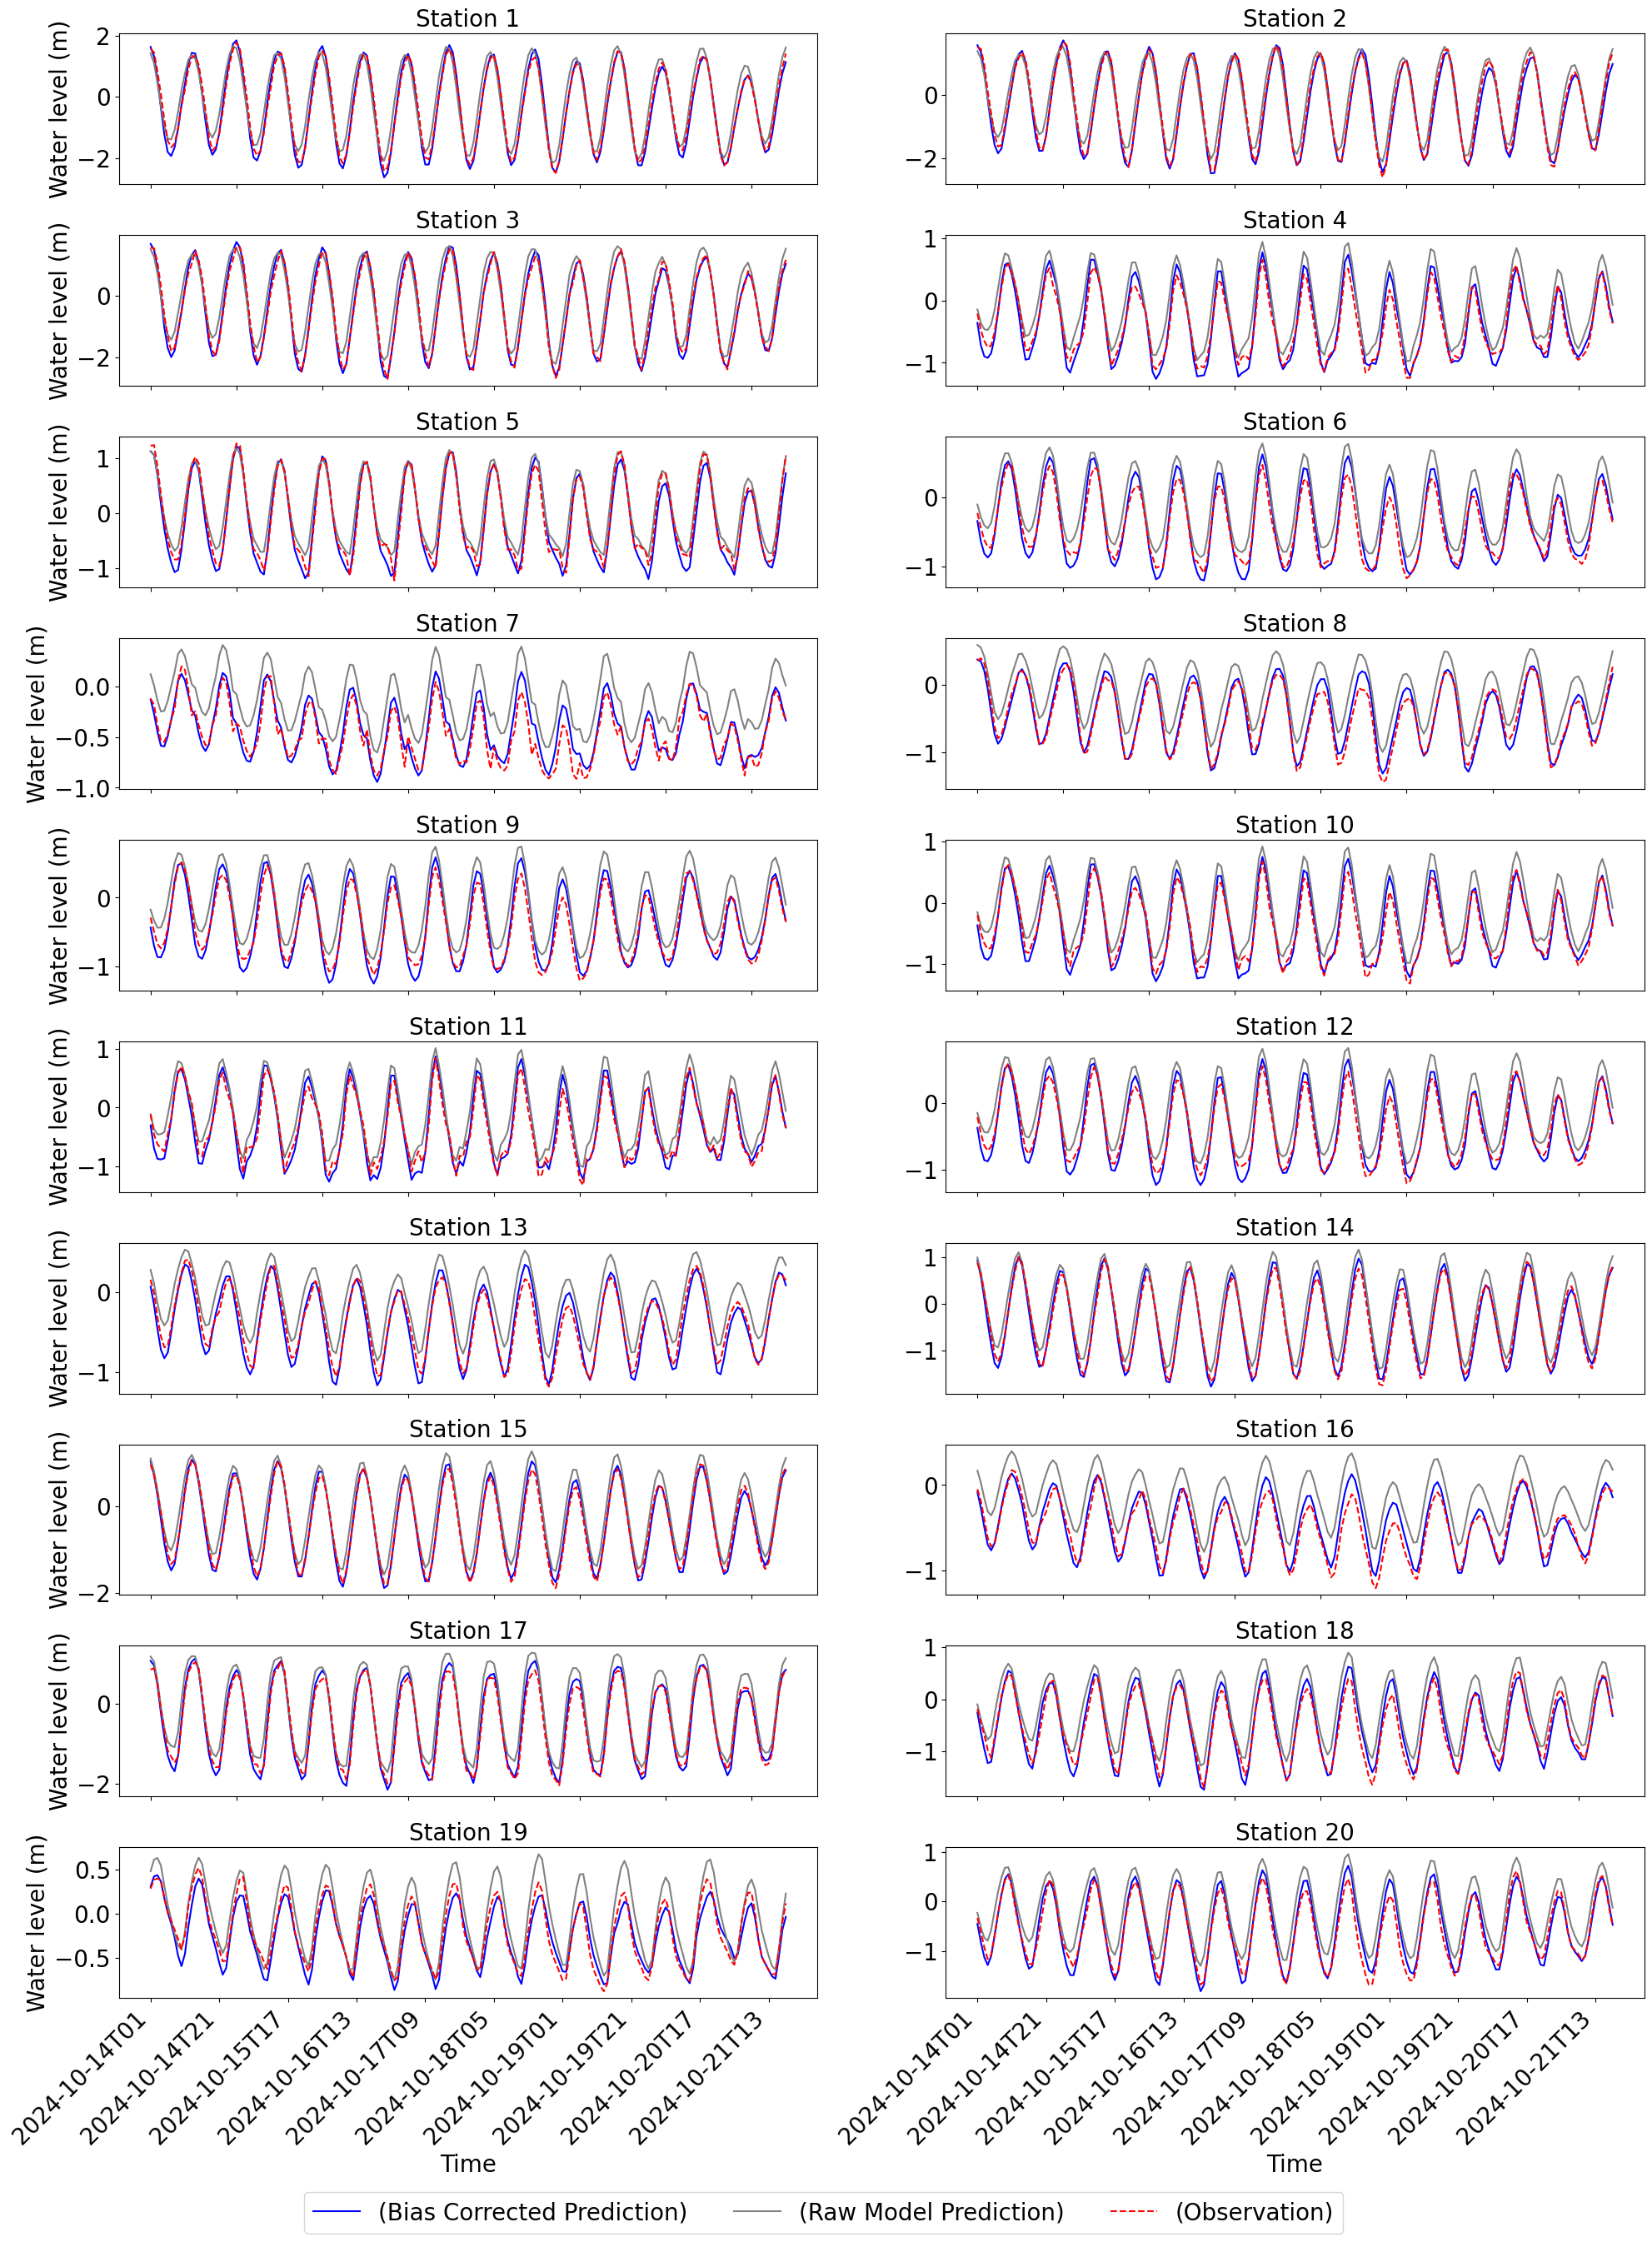

In [7]:

# Assuming `water_level_prediction_test`, `y_test0`, `x_test0` are predefined as per your data
# This will work with your 10x2 grid of subplots

# Set number of rows and columns
nrows = 10
ncols = 2

# Create subplots with 10 rows and 2 columns
fig1, axs1 = plt.subplots(nrows, ncols, figsize=(20, 27))  # Adjust the figsize to accommodate all plots

# Assuming cycle is the specific time point you're working with
cycle = 800


tick_positions = np.arange(0, 186, 20)
tick_labels = [str(t).strip("'")[0:13] for t in Time[cycle,:][tick_positions]]

# Flatten the 2D array of axes (axs1 is now a 2D array, we flatten it for easier iteration)
axs1 = axs1.flatten()

for station in range(20):
    axs1[station].plot(Test_p[cycle][station][:], label='(Bias Corrected Prediction)', color='blue')
    axs1[station].plot(Test_r[cycle][station][:], label='(Raw Model Prediction)', color='gray')
    axs1[station].plot(Test_t[cycle][station][:], 
                       label='(Observation)', linestyle='--', color='red')
    

    axs1[station].tick_params(axis='both', which='major', labelsize=20)
    
    # Set the title for each subplot
    axs1[station].set_title(f'Station {station + 1}', fontsize=20)

    if station < 18: 
        # For all rows EXCEPT the last one (stations 0 through 17)
        # We turn off the bottom tick labels
        axs1[station].tick_params(axis='x', which='both', labelbottom=False)

handles, labels = axs1[0].get_legend_handles_labels()
LEGEND_SPACE_FRACTION = 0.025 # Start with 5% of the figure height for the legend
# --- NEW CODE TO MOVE LEGEND TO THE BOTTOM ---
fig1.legend(
    handles, 
    labels, 
    loc='lower center',       # Position the legend relative to the anchor point
    bbox_to_anchor=(0.5, 0), # (X, Y) coordinates relative to the figure. (0.5, 0.0) is the center bottom.
    ncol=3,                   # Display the legend items in a single row (3 columns)
    fontsize=20               # Maintain the desired font size
)

# Add a legend to the first plot (this is common to all subplots)
#axs1[0].legend(loc='upper left', fontsize=20)

# Add x-axis label ("Time step") to the last row (stations 11 to 20)
for station in [18, 19]:  # Last row corresponds to station 10-19
    axs1[station].set_xlabel('Time', fontsize=20)

# The last row of subplots is for stations 18 and 19 (indices 18 and 19 in the flattened array)
for station_index in [18, 19]:
    ax = axs1[station_index]
    
    # Set the new tick positions and labels
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right') # Rotate for better visibility

# ---------------------------------------------------

# Add y-axis label ("Water level (m)") to the plots on the left (stations 1, 3, 5, ..., 19)
for station in range(0, 20, 2):  # First column corresponds to stations 0, 2, 4, ..., 18
    axs1[station].set_ylabel('Water level (m)', fontsize=20)
    
# Adjust layout to prevent overlapping
#fig1.tight_layout()
fig1.tight_layout(rect=[0, LEGEND_SPACE_FRACTION, 1, 1])
# Save the plot as a PNG file with 300 DPI
plt.savefig(f'timeseries-{cycle}.png', dpi=300)

# Show the plot
plt.show()


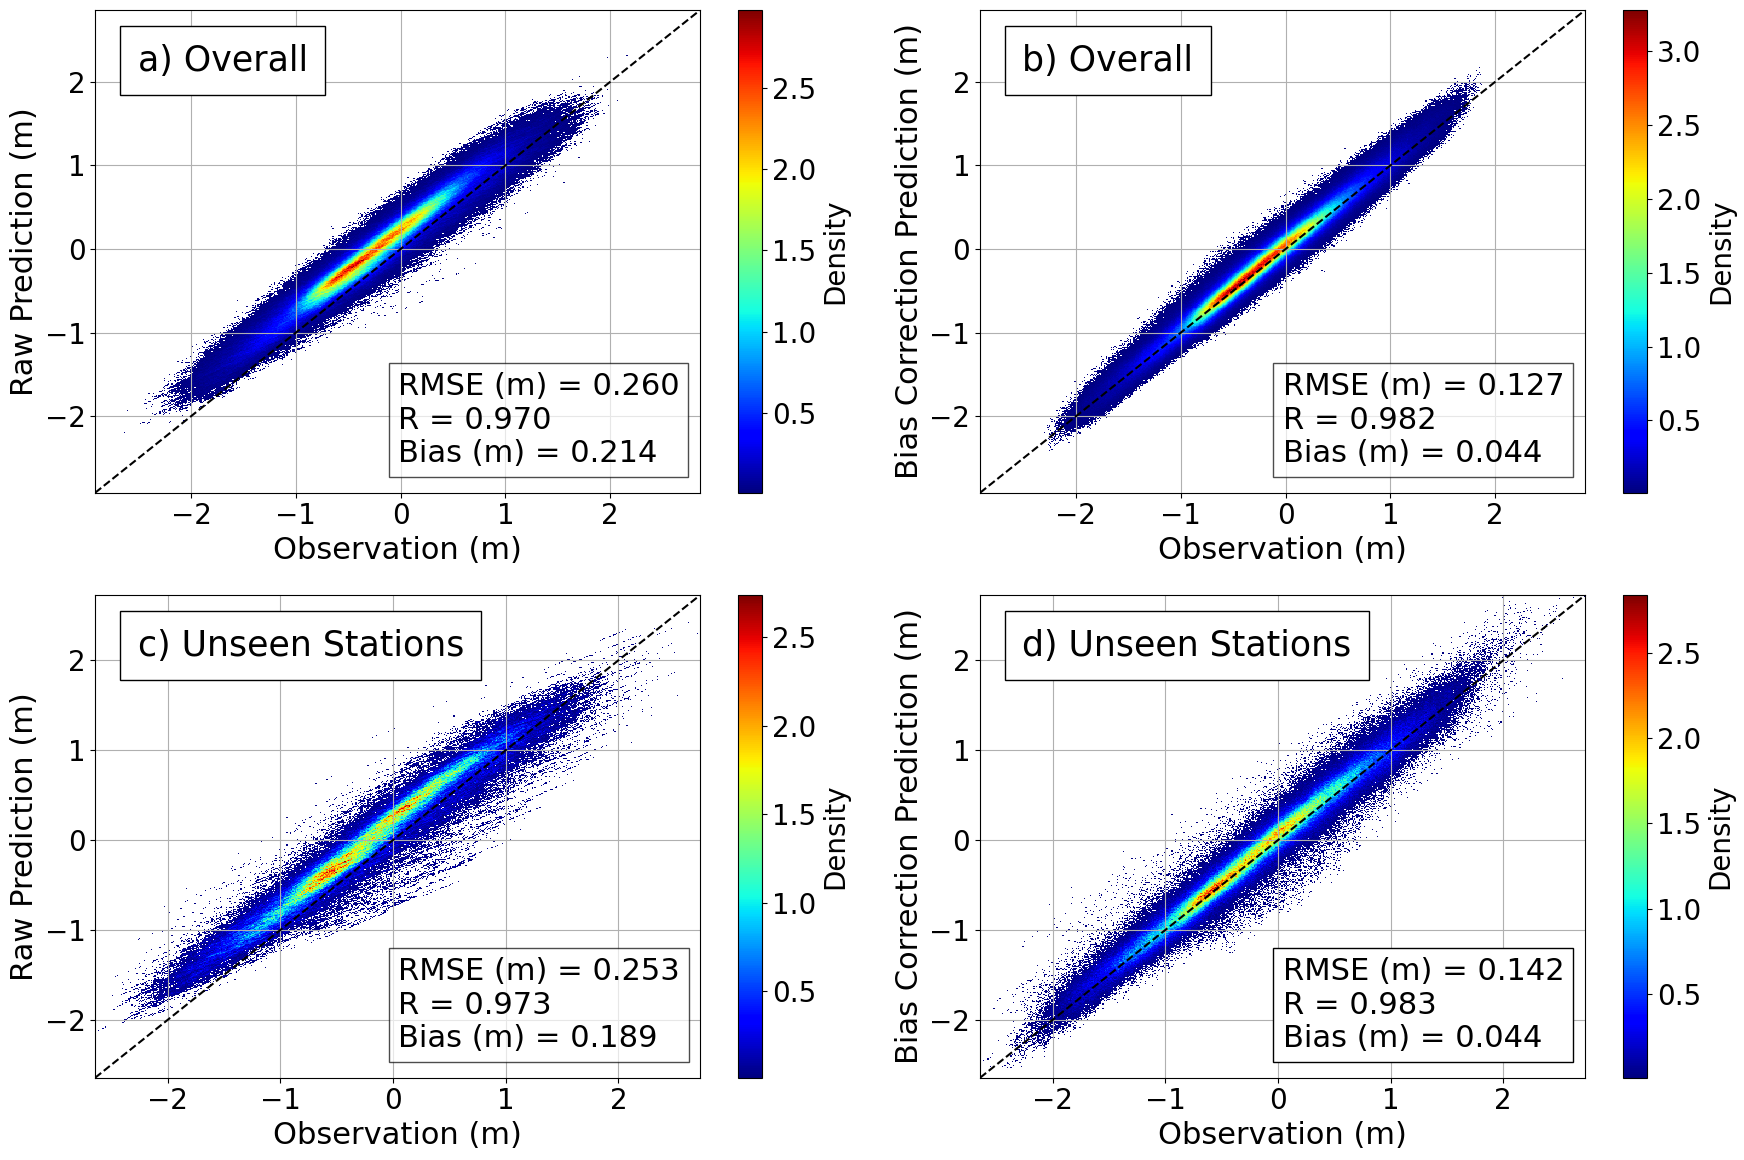

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0, 0], label='Density')

# Set the x and y limits to match the range of a
axes[0, 0].set_xlim(a.min(), a.max())
axes[0, 0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(b, a)[0, 1] 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 0].text(0.5, 0.25, stats_text, transform=axes[0, 0].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 0].text(0.07, 0.93, "a) Overall", transform=axes[0, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0, 0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[0, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[0, 1], label='Density')

# Set the x and y limits to match the range of a
axes[0, 1].set_xlim(a.min(), a.max())
axes[0, 1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(b, a)[0, 1] 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 1].text(0.5, 0.25, stats_text, transform=axes[0, 1].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 1].text(0.07, 0.93, "b) Overall", transform=axes[0, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[0, 1].set_xlabel('Observation (m)', fontsize=22)

# Third subplot (on the bottom-left) - Similar to first subplot but for a different subset of data
# (you can adjust this to your needs, for example, different stations or data)
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_r[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[1, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[1, 0], label='Density')

# Set the x and y limits to match the range of a
axes[1, 0].set_xlim(a.min(), a.max())
axes[1, 0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(b, a)[0, 1] 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 0].text(0.5, 0.25, stats_text, transform=axes[1, 0].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 0].text(0.07, 0.93, "c) Unseen Stations", transform=axes[1, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[1, 0].set_xlabel('Observation (m)', fontsize=22)

# Fourth subplot (on the bottom-right) - Similar to second subplot
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_p[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1, 1], label='Density')

# Set the x and y limits to match the range of a
axes[1, 1].set_xlim(a.min(), a.max())
axes[1, 1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(b, a)[0, 1] 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 1].text(0.5, 0.25, stats_text, transform=axes[1, 1].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 1].text(0.07, 0.93, "d) Unseen Stations", transform=axes[1, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[1, 1].set_xlabel('Observation (m)', fontsize=22)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('scatter_R.png', dpi=1200)

# Show the plot
plt.show()


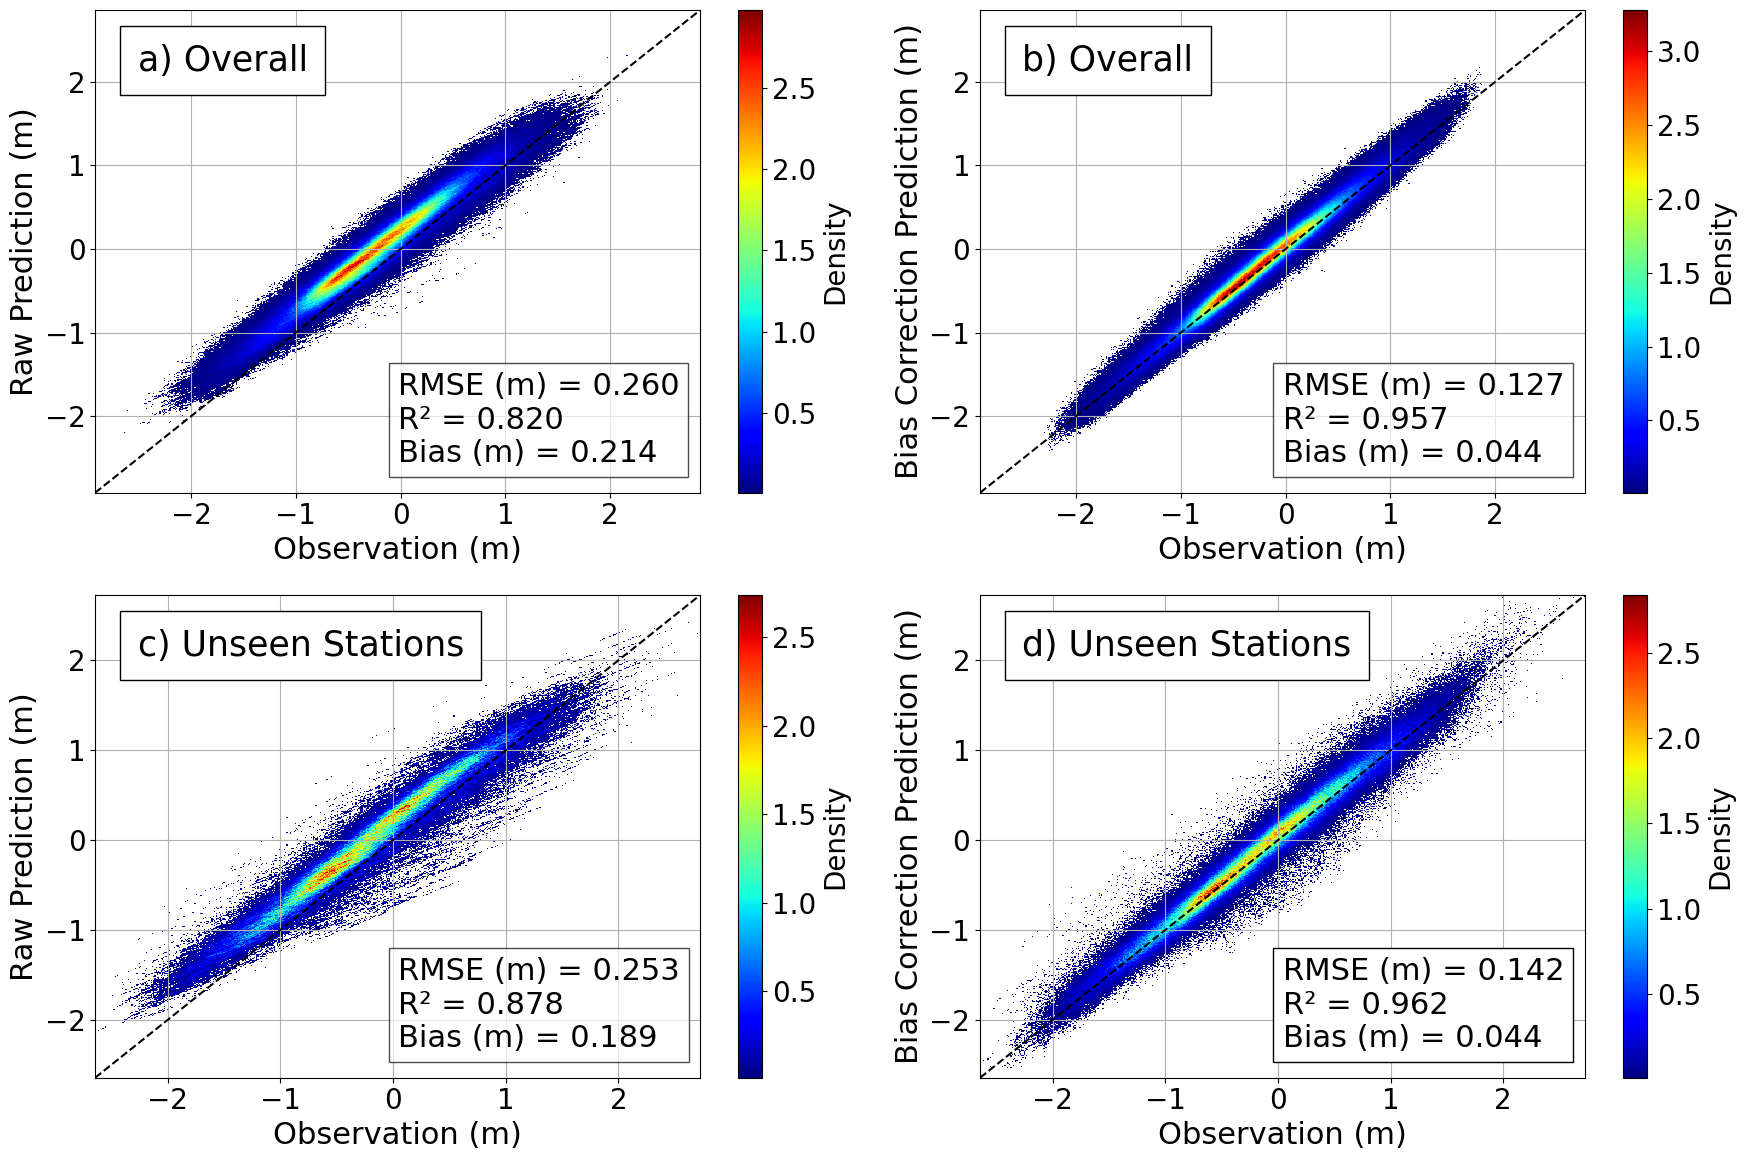

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
from sklearn.metrics import r2_score

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0, 0], label='Density')

# Set the x and y limits to match the range of a
axes[0, 0].set_xlim(a.min(), a.max())
axes[0, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 0].text(0.5, 0.25, stats_text, transform=axes[0, 0].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 0].text(0.07, 0.93, "a) Overall", transform=axes[0, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0, 0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[0, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[0, 1], label='Density')

# Set the x and y limits to match the range of a
axes[0, 1].set_xlim(a.min(), a.max())
axes[0, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 1].text(0.5, 0.25, stats_text, transform=axes[0, 1].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 1].text(0.07, 0.93, "b) Overall", transform=axes[0, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[0, 1].set_xlabel('Observation (m)', fontsize=22)

# Third subplot (on the bottom-left) - Similar to first subplot but for a different subset of data
# (you can adjust this to your needs, for example, different stations or data)
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_r[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[1, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[1, 0], label='Density')

# Set the x and y limits to match the range of a
axes[1, 0].set_xlim(a.min(), a.max())
axes[1, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b) 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 0].text(0.5, 0.25, stats_text, transform=axes[1, 0].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 0].text(0.07, 0.93, "c) Unseen Stations", transform=axes[1, 0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[1, 0].set_xlabel('Observation (m)', fontsize=22)

# Fourth subplot (on the bottom-right) - Similar to second subplot
a = Test_t[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)
b = Test_p[:, [i for i in range(Test_t.shape[1]) if i in [1, 5, 13]], :].reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1, 1], label='Density')

# Set the x and y limits to match the range of a
axes[1, 1].set_xlim(a.min(), a.max())
axes[1, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b) 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 1].text(0.5, 0.25, stats_text, transform=axes[1, 1].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 1].text(0.07, 0.93, "d) Unseen Stations", transform=axes[1, 1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 1].set_ylabel('Bias Correction Prediction (m)', fontsize=22)
axes[1, 1].set_xlabel('Observation (m)', fontsize=22)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('scatter_R2.png', dpi=1200)

# Show the plot
plt.show()


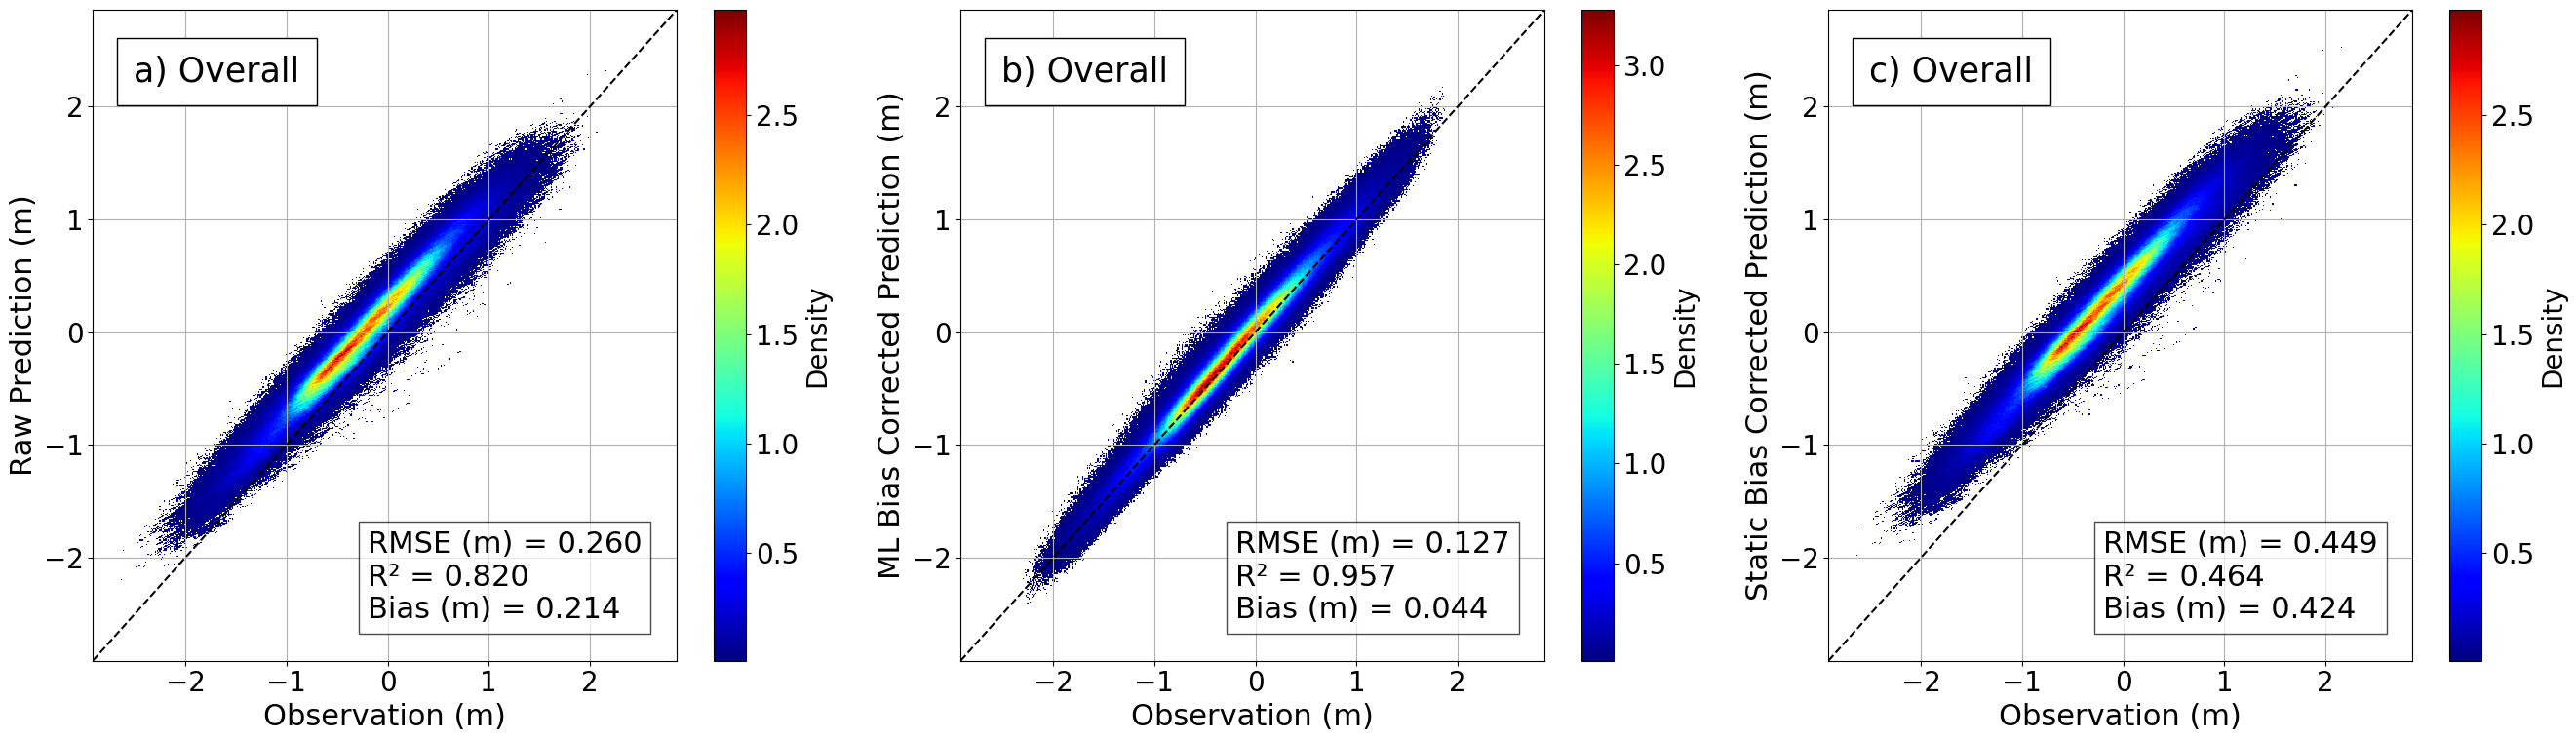

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
from sklearn.metrics import r2_score

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0].text(0.47, 0.2, stats_text, transform=axes[0].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0].text(0.07, 0.93, "a) Overall", transform=axes[0].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[ 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1].text(0.47, 0.2, stats_text, transform=axes[1].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1].text(0.07, 0.93, "b) Overall", transform=axes[1].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[1].set_ylabel('ML Bias Corrected Prediction (m)', fontsize=22)
axes[1].set_xlabel('Observation (m)', fontsize=22)

# third subplot 
a = Test_t.reshape(-1)

Test_bc = Test_r.copy()

for s in range(20):
    Test_bc[:,s,:] = Test_r[:,s,:]+bc_mean[s]

b = Test_bc.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[2].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[2].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[2], label='Density')

# Set the x and y limits to match the range of a
axes[2].set_xlim(a.min(), a.max())
axes[2].set_ylim(a.min(), a.max())

correlation = r2_score(a, b) 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[2].text(0.47, 0.2, stats_text, transform=axes[2].transAxes, fontsize=22, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[2].text(0.07, 0.93, "c) Overall", transform=axes[2].transAxes, color='black', fontsize=25, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[2].set_ylabel('Static Bias Corrected Prediction (m)', fontsize=22)
axes[2].set_xlabel('Observation (m)', fontsize=22)



# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('scatter_R2_bc_comparison.png', dpi=1200)

# Show the plot
plt.show()


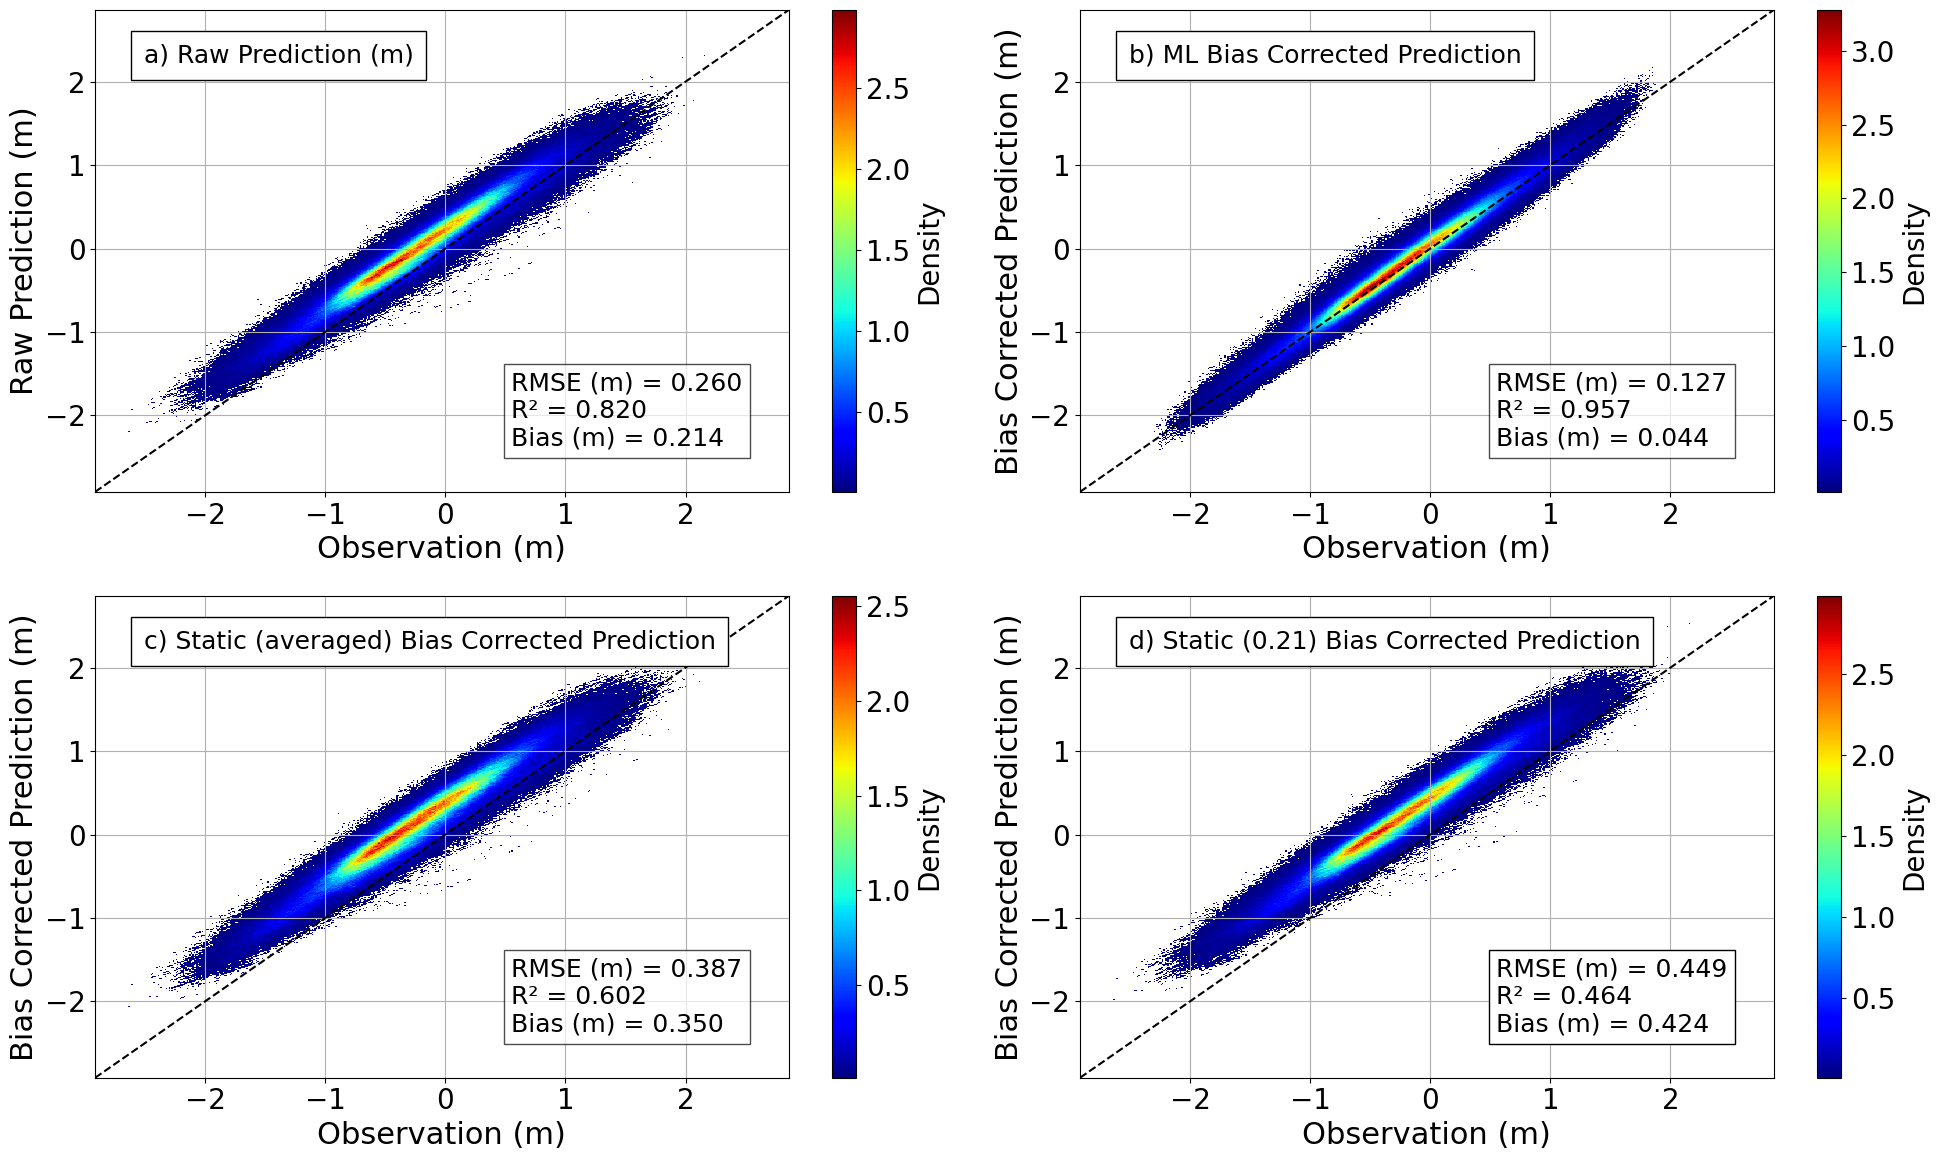

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import hydroeval as he
from sklearn.metrics import r2_score

# Set global font family and size
plt.rcParams.update({
    'font.size': 20,             # Default font size for text elements
    'axes.labelsize': 20,        # Axis label font size
    'xtick.labelsize': 20,       # Font size for x-tick labels
    'ytick.labelsize': 20,       # Font size for y-tick labels
    'legend.fontsize': 20,       # Font size for legend
    'figure.figsize': (16, 9),   # Updated to make room for additional subplots
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})

# Create 2 rows of subplots (1 row with 2 plots and another row with 2 plots)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 2 columns

# First subplot (on the top-left) - Bias Corrected Prediction for all stations (excluding 1, 5, 13)
a = Test_t.reshape(-1)
b = Test_r.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0, 0], label='Density')

# Set the x and y limits to match the range of a
axes[0, 0].set_xlim(a.min(), a.max())
axes[0, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 0].text(0.6, 0.25, stats_text, transform=axes[0, 0].transAxes, fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 0].text(0.07, 0.93, "a) Raw Prediction (m)", transform=axes[0, 0].transAxes, color='black', fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 0].set_ylabel('Raw Prediction (m)', fontsize=22)
axes[0, 0].set_xlabel('Observation (m)', fontsize=22)

# Second subplot (on the top-right) - Bias Corrected Prediction for unseen stations (1, 5, 13)
a = Test_t.reshape(-1)
b = Test_p.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[0, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[0, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[0, 1], label='Density')

# Set the x and y limits to match the range of a
axes[0, 1].set_xlim(a.min(), a.max())
axes[0, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b)
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box at the top-left corner of the second subplot
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[0, 1].text(0.6, 0.25, stats_text, transform=axes[0, 1].transAxes, fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[0, 1].text(0.07, 0.93, "b) ML Bias Corrected Prediction", transform=axes[0, 1].transAxes, color='black', fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))


axes[0, 1].set_ylabel('Bias Corrected Prediction (m)', fontsize=22)
axes[0, 1].set_xlabel('Observation (m)', fontsize=22)

# Third subplot (on the bottom-left) - Similar to first subplot but for a different subset of data
a = Test_t.reshape(-1)

Test_bc = Test_r.copy()

for s in range(20):
    Test_bc[:,s,:] = Test_r[:,s,:]+bc_mean[s]

b = Test_bc.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h2 = axes[1, 0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[1, 0], label='Density')

# Set the x and y limits to match the range of a
axes[1, 0].set_xlim(a.min(), a.max())
axes[1, 0].set_ylim(a.min(), a.max())

correlation = r2_score(a, b) 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 0].text(0.6, 0.25, stats_text, transform=axes[1, 0].transAxes, fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 0].text(0.07, 0.93, "c) Static (averaged) Bias Corrected Prediction", transform=axes[1, 0].transAxes, color='black', fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 0].set_ylabel('Bias Corrected Prediction (m)', fontsize=22)
axes[1, 0].set_xlabel('Observation (m)', fontsize=22)

# Fourth subplot (on the bottom-right) - Similar to second subplot
a = Test_t.reshape(-1)

Test_bc = Test_r.copy()

for s in range(20):
    Test_bc[:,s,:] = Test_r[:,s,:]+0.21

b = Test_bc.reshape(-1)

# Plot the line of perfect agreement (y=x)
axes[1, 1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Plot the 2D histogram
h = axes[1, 1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1, 1], label='Density')

# Set the x and y limits to match the range of a
axes[1, 1].set_xlim(a.min(), a.max())
axes[1, 1].set_ylim(a.min(), a.max())

correlation = r2_score(a, b) 
rmse = np.sqrt(np.mean((b - a)**2))
bias  = np.mean(b - a)
# Add statistics in a text box
stats_text = f"RMSE (m) = {rmse:.3f}\nR² = {correlation:.3f}\nBias (m) = {bias:.3f}"
axes[1, 1].text(0.6, 0.25, stats_text, transform=axes[1, 1].transAxes, fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.3'))

axes[1, 1].text(0.07, 0.93, "d) Static (0.21) Bias Corrected Prediction", transform=axes[1, 1].transAxes, color='black', fontsize=18, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=1, edgecolor='black', boxstyle='square,pad=0.5'))

axes[1, 1].set_ylabel('Bias Corrected Prediction (m)', fontsize=22)
axes[1, 1].set_xlabel('Observation (m)', fontsize=22)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('scatter_R2_bc_comparison.png', dpi=1200)

# Show the plot
plt.show()


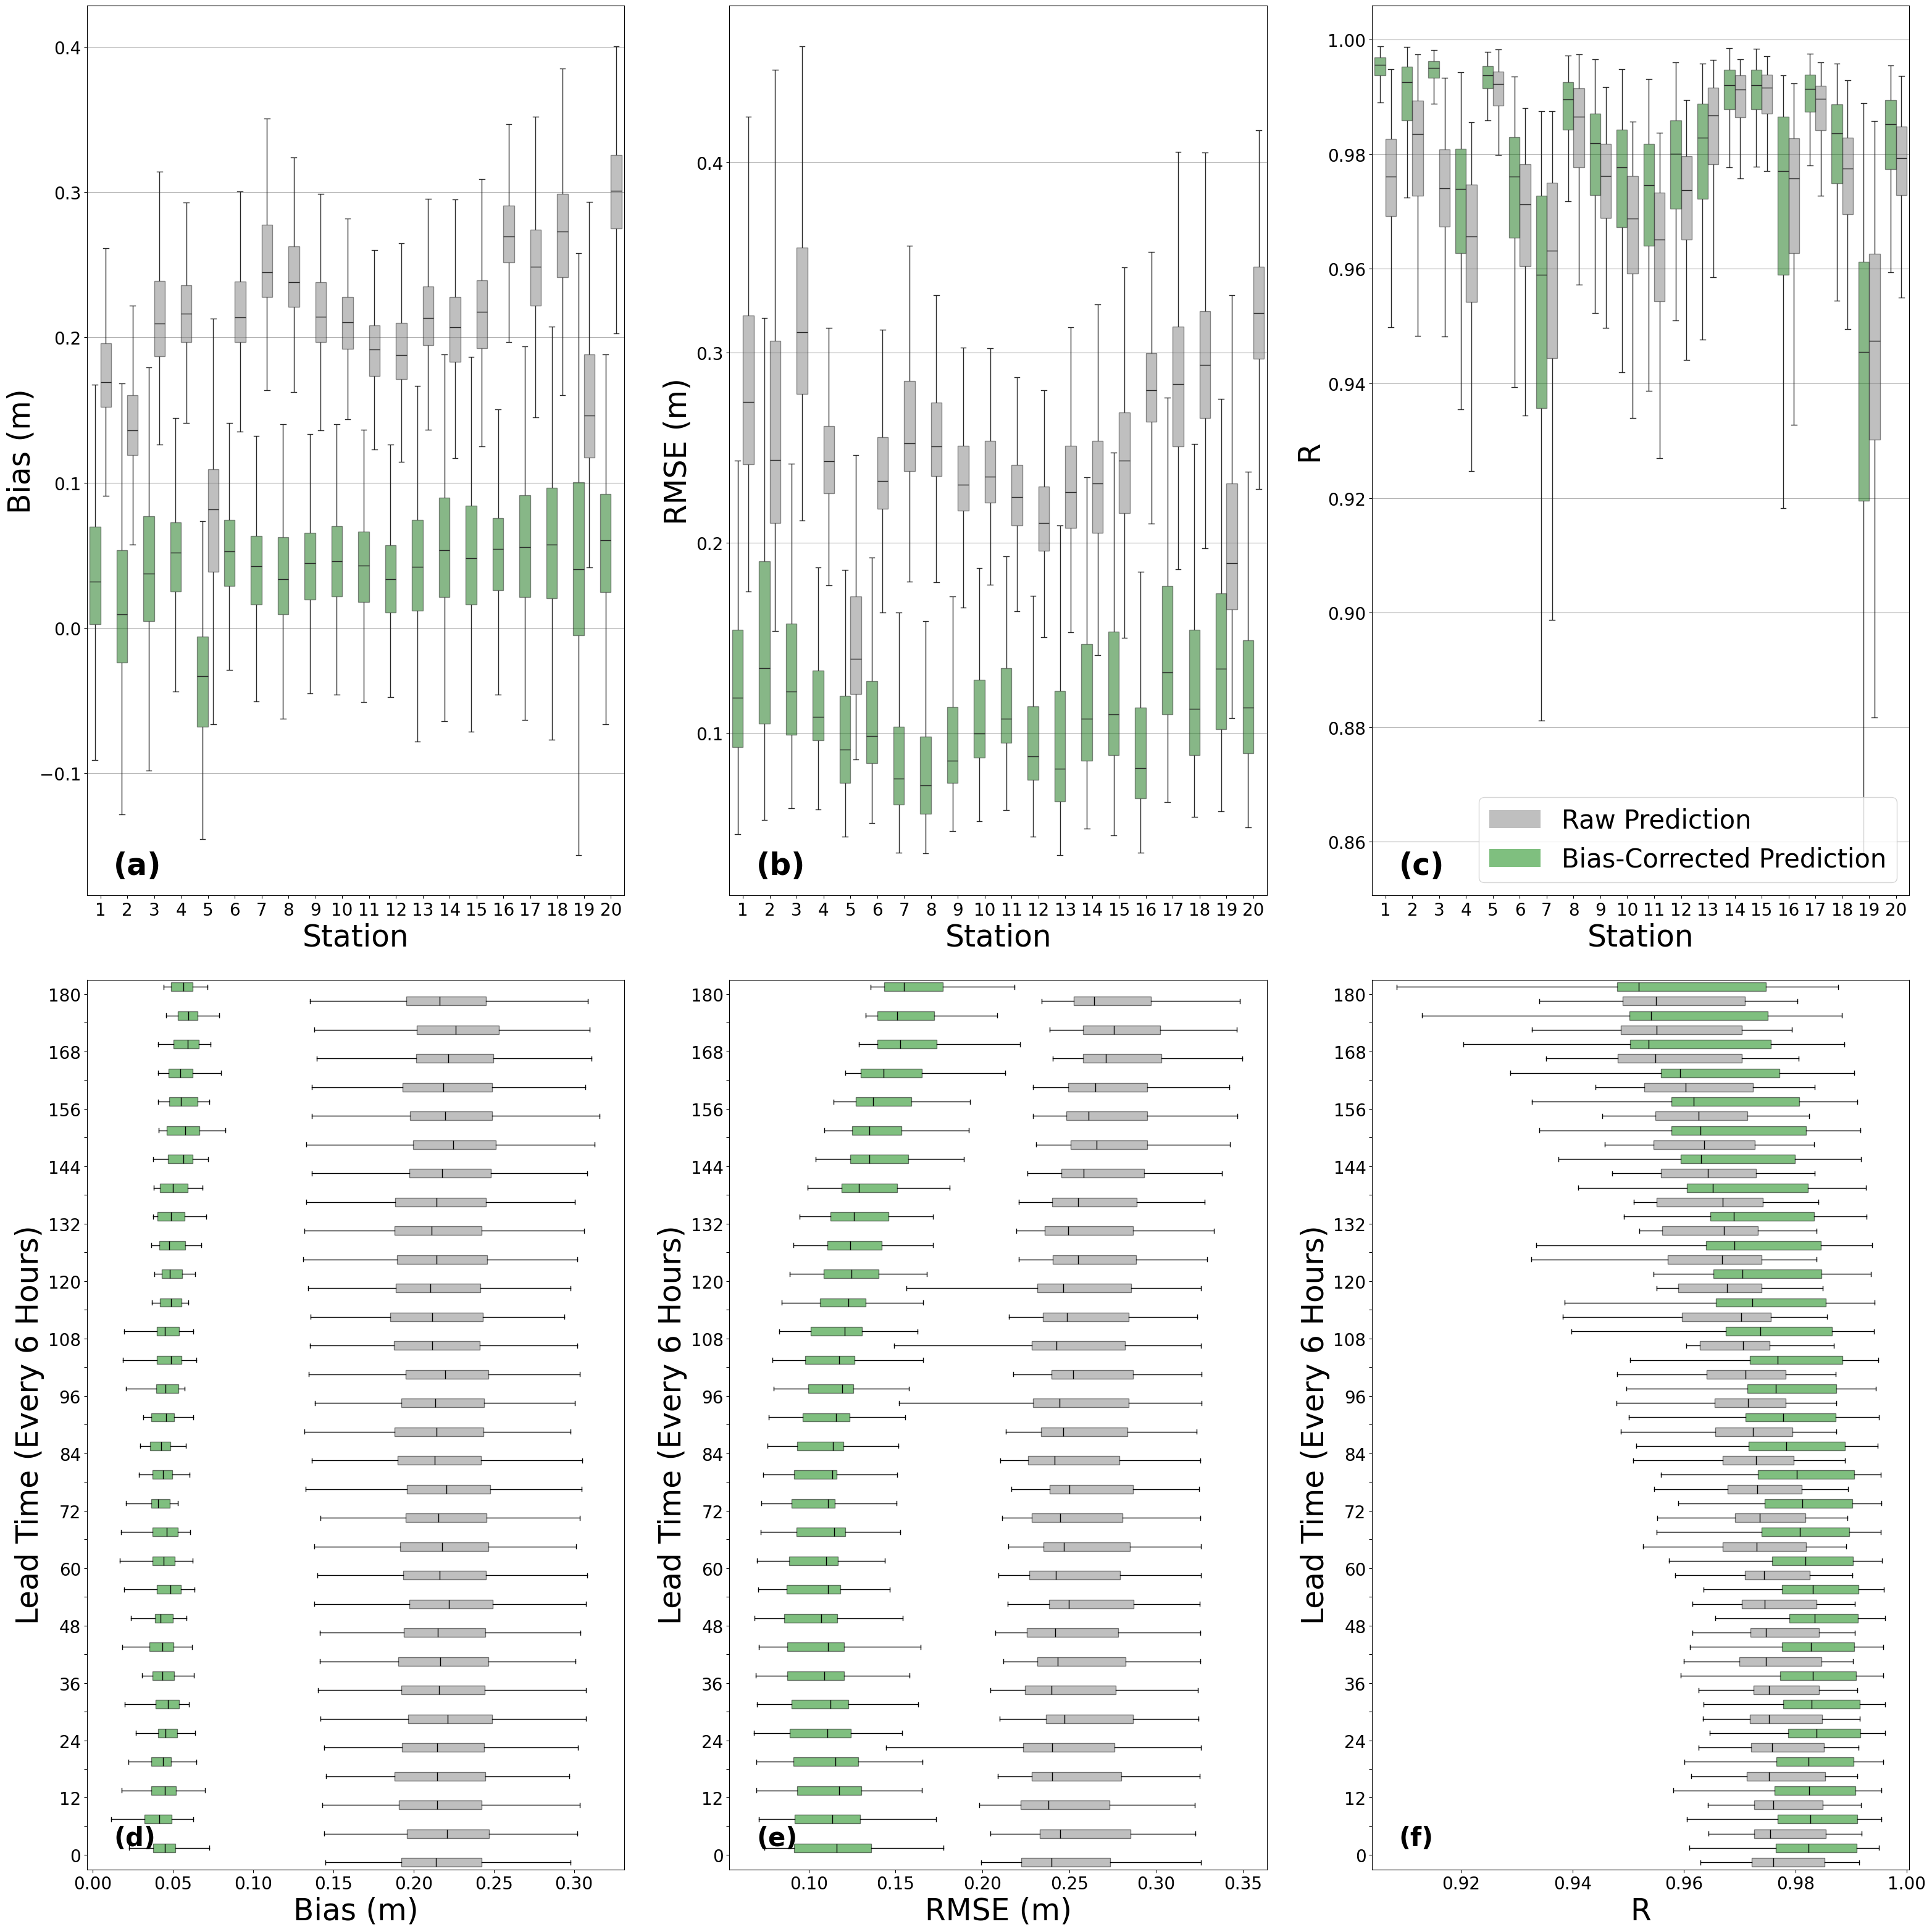

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Ensure font settings
plt.rcParams.update({
    'font.size': 30,
    'axes.labelsize': 35,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 30,
})



bias_corrected_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_r = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_r = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

def r(predictions, true_values):
    return np.corrcoef(predictions, true_values)[0, 1]

for j in range(np.shape(Test_t)[0]):
    for i in range(20):
        bias_corrected_rmse[j, i] = np.sqrt(np.mean((Test_p[j, i, :] - Test_t[j, i, :])**2))
        raw_rmse[j, i] = np.sqrt(np.mean((Test_r[j, i, :] - Test_t[j, i, :])**2))
        bias_corrected_r[j, i] = r(Test_t[j, i, :], Test_p[j, i, :])
        raw_r[j, i] = r(Test_t[j, i, :], Test_r[j, i, :])
        bias_corrected_bias[j, i] = np.mean(Test_p[j, i, :]-Test_t[j, i, :])
        raw_bias[j, i] = np.mean(Test_r[j, i, :]-Test_t[j, i, :])


# Metrics
labels = ['a', 'b', 'c', 'd', 'e', 'f']
metrics = {
    'Bias (m)': (bias_corrected_bias, raw_bias),
    'RMSE (m)': (bias_corrected_rmse, raw_rmse),
    'R': (bias_corrected_r, raw_r)
}

# Time indices
time_indices = range(0, 186, 6)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def r_manual(predictions, true_values):
    r = np.empty(np.shape(predictions)[1])
    for k1 in range(np.shape(r)[0]):
            r[k1] = np.corrcoef(predictions[:,k1,:].reshape(-1), true_values[:,k1,:].reshape(-1))[0, 1]
    return r

# Create a combined 2-row, 3-column figure
fig, axes = plt.subplots(2, 3, figsize=(32, 32))
axes = axes.flatten()

# --- Top Row: Station-wise boxplots ---
for i, (metric_name, (bias_corrected, raw)) in enumerate(metrics.items()):
    df_list = []
    for station in range(20):
        df = pd.DataFrame(np.column_stack((bias_corrected[:, station], raw[:, station])),
                          columns=['Bias Corrected Prediction', 'Raw Prediction'])
        df['Station'] = station + 1
        df_list.append(df)

    cdf = pd.concat(df_list)
    mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name=metric_name)

    sns.boxplot(x="Station", y=metric_name, hue="Prediction Type", data=mdf,
                palette={'Bias Corrected Prediction': 'green', 'Raw Prediction': 'gray'},
                showfliers=False, boxprops=dict(alpha=0.5), ax=axes[i])
    
    axes[i].set_xlabel('Station')
    axes[i].set_ylabel(metric_name)
    axes[i].tick_params(axis='both')
    axes[i].text(0.05, 0.05, f'({labels[i]})', transform=axes[i].transAxes,
                 fontsize=35, fontweight='bold', va='top', ha='left')
    axes[i].get_legend().remove()

# --- Bottom Row: Lead-time-wise boxplots ---
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
r_raw_samples = [r_manual(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
r_corrected_samples = [r_manual(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]

leadtime_data = [
    (bias_raw_samples, bias_corrected_samples, 'Bias (m)'),
    (rmse_raw_samples, rmse_corrected_samples, 'RMSE (m)'),
    (r_raw_samples, r_corrected_samples, 'R')
]

for j, (raw_samp, corrected_samp, ylabel) in enumerate(leadtime_data, start=3):
    axes[j].boxplot(raw_samp, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].boxplot(corrected_samp, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
    axes[j].set_yticklabels([f'{i}' for i in time_indices])
    axes[j].set_ylabel('Lead Time (Every 6 Hours)')
    axes[j].set_xlabel(ylabel)
    axes[j].text(0.05, 0.05, f'({labels[j]})', transform=axes[j].transAxes,
                 fontsize=30, fontweight='bold', va='top', ha='left')
    axes[j].grid()
    labels_y = axes[j].get_yticklabels()
    for k, label in enumerate(labels_y):
        if k % 2 != 0:
            label.set_visible(False)

# Add legend to bottom-right plot
axes[2].legend(handles=[
    Patch(facecolor='gray', alpha=0.5, label='Raw Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
], loc='lower right', fontsize=30)

plt.tight_layout()
plt.savefig("boxplots_R.png", dpi=600, bbox_inches='tight')
plt.show()


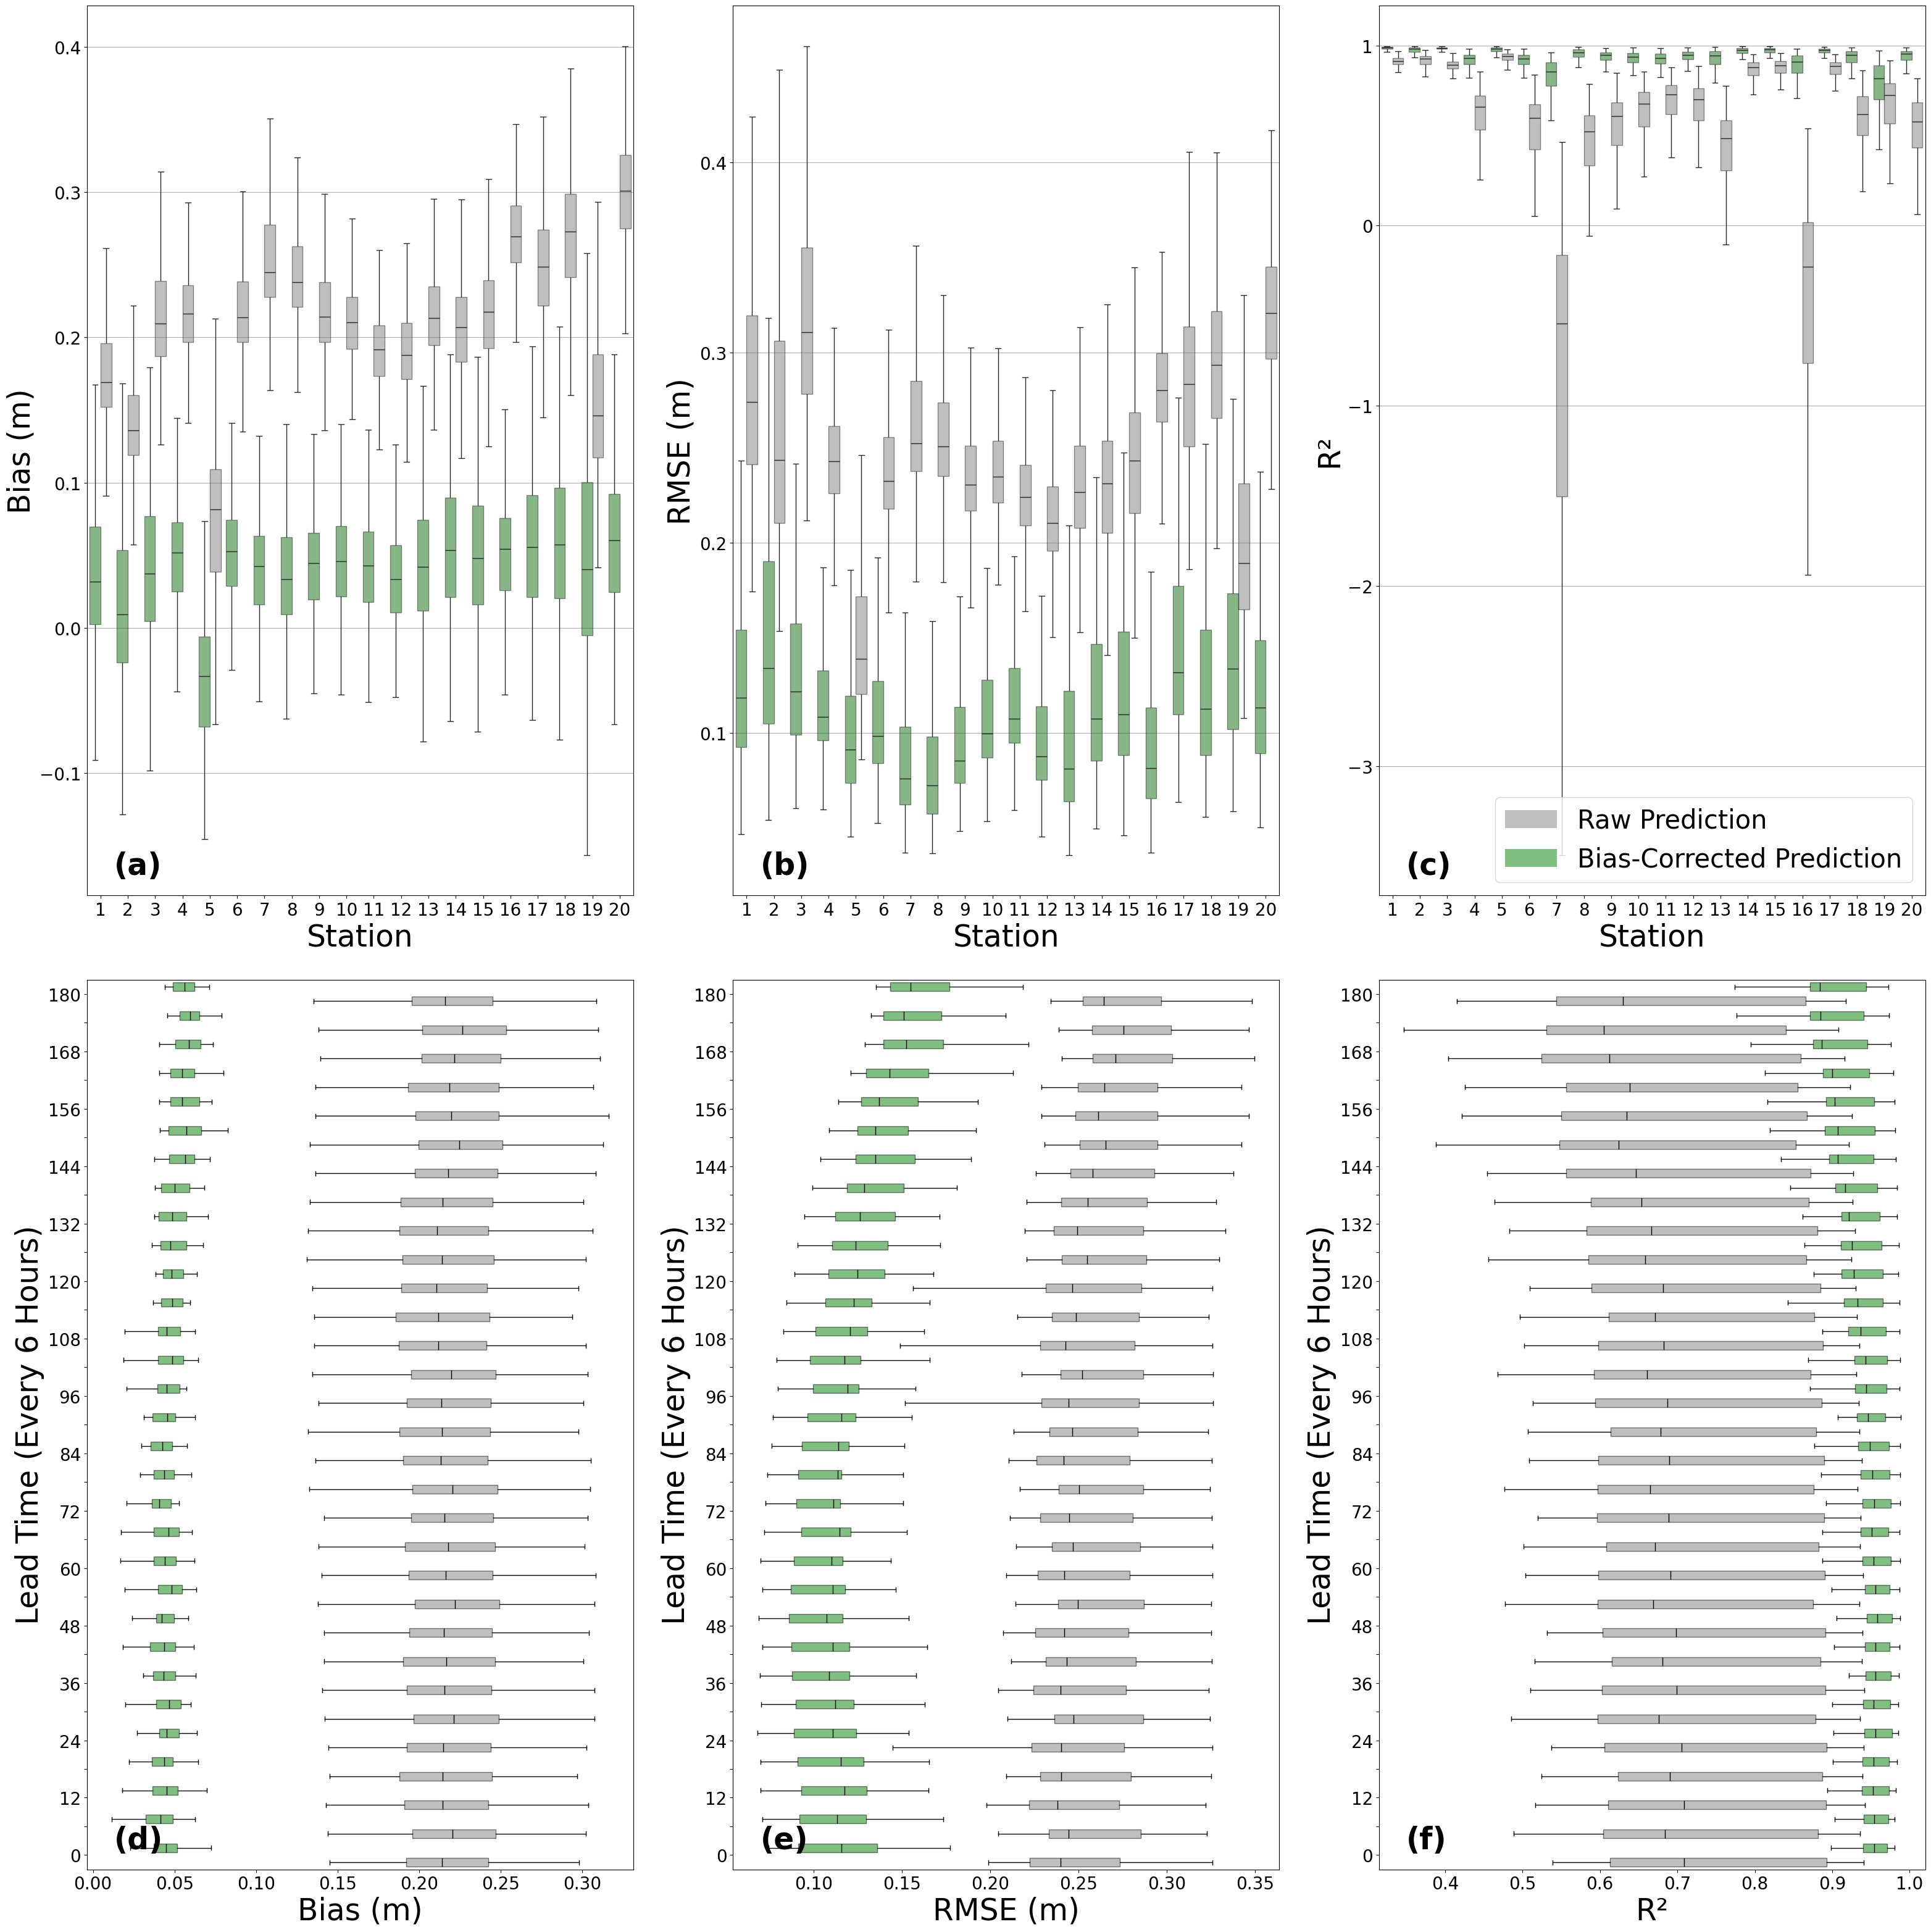

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

bias_corrected_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_rmse = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_r2 = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_r2 = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

bias_corrected_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])
raw_bias = np.empty([np.shape(Test_t)[0], np.shape(Test_t)[1]])

def r2(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2)
    ss_tot = np.sum((true_values - np.mean(true_values)) ** 2)
    return 1 - ss_res / ss_tot


for j in range(np.shape(Test_t)[0]):
    for i in range(20):
        bias_corrected_rmse[j, i] = np.sqrt(np.mean((Test_p[j, i, :] - Test_t[j, i, :])**2))
        raw_rmse[j, i] = np.sqrt(np.mean((Test_r[j, i, :] - Test_t[j, i, :])**2))
        bias_corrected_r2[j, i] = r2(Test_t[j, i, :], Test_p[j, i, :])
        raw_r2[j, i] = r2(Test_t[j, i, :], Test_r[j, i, :])
        bias_corrected_bias[j, i] = np.mean(Test_p[j, i, :]-Test_t[j, i, :])
        raw_bias[j, i] = np.mean(Test_r[j, i, :]-Test_t[j, i, :])

# Ensure font settings
plt.rcParams.update({
    'font.size': 30,
    'axes.labelsize': 35,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 30,
})

# Metrics
labels = ['a', 'b', 'c', 'd', 'e', 'f']
metrics = {
    'Bias (m)': (bias_corrected_bias, raw_bias),
    'RMSE (m)': (bias_corrected_rmse, raw_rmse),
    'R²': (bias_corrected_r2, raw_r2)
}

# Time indices
time_indices = range(0, 186, 6)

def rmse(predictions, true_values):
    return np.sqrt(np.mean((predictions - true_values) ** 2, axis=(0, 2)))

def r2_manual(predictions, true_values):
    ss_res = np.sum((true_values - predictions) ** 2, axis=(0, 2))
    ss_tot = np.sum((true_values - np.mean(true_values, axis=(0, 2), keepdims=True)) ** 2, axis=(0, 2))
    return 1 - ss_res / ss_tot

# Create a combined 2-row, 3-column figure
fig, axes = plt.subplots(2, 3, figsize=(32, 32))
axes = axes.flatten()

# --- Top Row: Station-wise boxplots ---
for i, (metric_name, (bias_corrected, raw)) in enumerate(metrics.items()):
    df_list = []
    for station in range(20):
        df = pd.DataFrame(np.column_stack((bias_corrected[:, station], raw[:, station])),
                          columns=['Bias Corrected Prediction', 'Raw Prediction'])
        df['Station'] = station + 1
        df_list.append(df)

    cdf = pd.concat(df_list)
    mdf = pd.melt(cdf, id_vars=['Station'], var_name='Prediction Type', value_name=metric_name)

    sns.boxplot(x="Station", y=metric_name, hue="Prediction Type", data=mdf,
                palette={'Bias Corrected Prediction': 'green', 'Raw Prediction': 'gray'},
                showfliers=False, boxprops=dict(alpha=0.5), ax=axes[i])
    
    axes[i].set_xlabel('Station')
    axes[i].set_ylabel(metric_name)
    axes[i].tick_params(axis='both')
    axes[i].text(0.05, 0.05, f'({labels[i]})', transform=axes[i].transAxes,
                 fontsize=35, fontweight='bold', va='top', ha='left')
    axes[i].get_legend().remove()

# --- Bottom Row: Lead-time-wise boxplots ---
bias_raw_samples = [np.mean(Test_r[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
bias_corrected_samples = [np.mean(Test_p[:, :, i:i+6] - Test_t[:, :, i:i+6], axis=(0, 2)) for i in time_indices]
rmse_raw_samples = [rmse(Test_r[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
rmse_corrected_samples = [rmse(Test_p[:, :, i:i+6], Test_t[:, :, i:i+6]) for i in time_indices]
r2_raw_samples = [r2_manual(Test_t[:, :, i:i+6], Test_r[:, :, i:i+6]) for i in time_indices]
r2_corrected_samples = [r2_manual(Test_t[:, :, i:i+6], Test_p[:, :, i:i+6]) for i in time_indices]

leadtime_data = [
    (bias_raw_samples, bias_corrected_samples, 'Bias (m)'),
    (rmse_raw_samples, rmse_corrected_samples, 'RMSE (m)'),
    (r2_raw_samples, r2_corrected_samples, 'R²')
]

for j, (raw_samp, corrected_samp, ylabel) in enumerate(leadtime_data, start=3):
    axes[j].boxplot(raw_samp, positions=np.arange(len(time_indices)) * 2, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='gray', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].boxplot(corrected_samp, positions=np.arange(len(time_indices)) * 2 + 1, widths=0.6, patch_artist=True,
                    showfliers=False, boxprops=dict(facecolor='green', alpha=0.5), medianprops=dict(color='black'), vert=False)
    axes[j].set_yticks(np.arange(len(time_indices)) * 2 + 0.5)
    axes[j].set_yticklabels([f'{i}' for i in time_indices])
    axes[j].set_ylabel('Lead Time (Every 6 Hours)')
    axes[j].set_xlabel(ylabel)
    axes[j].text(0.05, 0.05, f'({labels[j]})', transform=axes[j].transAxes,
                 fontsize=35, fontweight='bold', va='top', ha='left')
    axes[j].grid()
    labels_y = axes[j].get_yticklabels()
    for k, label in enumerate(labels_y):
        if k % 2 != 0:
            label.set_visible(False)

# Add legend to bottom-right plot
axes[2].legend(handles=[
    Patch(facecolor='gray', alpha=0.5, label='Raw Prediction'),
    Patch(facecolor='green', alpha=0.5, label='Bias-Corrected Prediction')
], loc='lower right', fontsize=30)

plt.tight_layout()
plt.savefig("boxplots_R2.png", dpi=600, bbox_inches='tight')
plt.show()

In [99]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load CSV file
df = pd.read_csv('/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info


# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}


# Separate data for the 99.9th and 99.99th percentiles

#******************************
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']
#df_99_9 = df[df['Threshold'] == '99th']
#df_99_99 = df[df['Threshold'] == '99.9th']

def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []  # List to store all matching indices
    # Iterate through each row and column in the 2D Time array to find the matching time
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices  # Return the list of matching indices

def extract_data_for_station(df_filtered, Time, Test_P, Tests_r, Test_t):
    extracted_data = {}
    
    for index, row in df_filtered.iterrows():
        #print(index)
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)
        
        # Find all (row, column) indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)
        
        if matching_indices:
            # Extract data for each matching index
            for row_idx, col_idx in matching_indices:
                # Get data from Test_P, Tests_r, Test_t for the matched index and station
                if station_id not in extracted_data:
                    extracted_data[station_id] = []
                
                extracted_data[station_id].append({
                    'Cycle': row_idx,
                    'Time': Time[row_idx, col_idx],
                    'Test_P': Test_P[row_idx, station_index, col_idx],  # Use station_index for correct station
                    'Tests_r': Tests_r[row_idx, station_index, col_idx],
                    'Test_t': Test_t[row_idx, station_index, col_idx]
                })
    
    return extracted_data

# Extract data for 99.9th and 99.99th percentiles separately
extracted_data_99_9 = extract_data_for_station(df_99_9, Time, Test_p, Test_r, Test_t)
extracted_data_99_99 = extract_data_for_station(df_99_99, Time, Test_p, Test_r, Test_t)

# The extracted data is stored in extracted_data_99_9 and extracted_data_99_99


In [100]:
extracted_data_99_9

{8418150: [{'Cycle': 29,
   'Time': np.datetime64('2024-01-10T13:00:00.000000000'),
   'Test_P': np.float64(1.9280829865044211),
   'Tests_r': np.float64(2.091650261313305),
   'Test_t': np.float64(1.6288005226266096)},
  {'Cycle': 30,
   'Time': np.datetime64('2024-01-10T13:00:00.000000000'),
   'Test_P': np.float64(2.2649221017302295),
   'Tests_r': np.float64(2.1185739382447024),
   'Test_t': np.float64(1.6826478764894048)},
  {'Cycle': 31,
   'Time': np.datetime64('2024-01-10T13:00:00.000000000'),
   'Test_P': np.float64(2.348453274237337),
   'Tests_r': np.float64(2.193228652941408),
   'Test_t': np.float64(1.831957305882816)},
  {'Cycle': 32,
   'Time': np.datetime64('2024-01-10T13:00:00.000000000'),
   'Test_P': np.float64(2.078795296574143),
   'Tests_r': np.float64(2.1224321811144624),
   'Test_t': np.float64(1.6903643622289248)},
  {'Cycle': 33,
   'Time': np.datetime64('2024-01-10T13:00:00.000000000'),
   'Test_P': np.float64(1.5900752495947021),
   'Tests_r': np.float64(1.9

In [101]:
# Step 1: Extract (station, cycle) pairs that are in 99.99th
cycles_99_99 = set(
    (station, entry['Cycle'])
    for station, entries in extracted_data_99_99.items()
    for entry in entries
)

# Step 2: Filter extracted_data_99_9 to remove those cycles
filtered_extracted_data_99_9 = {}

for station, entries in extracted_data_99_9.items():
    filtered_entries = [
        entry for entry in entries
        if (station, entry['Cycle']) not in cycles_99_99
    ]
    if filtered_entries:
        filtered_extracted_data_99_9[station] = filtered_entries

# `filtered_extracted_data_99_9` now excludes any cycle that is also in 99.99th


In [102]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in filtered_extracted_data_99_9.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_9 = np.array(all_test_p)
test_t_99_9 = np.array(all_test_t)
test_r_99_9 = np.array(all_test_r)

test_p_99_9.shape, test_t_99_9.shape, test_r_99_9.shape

((4928,), (4928,), (4928,))

In [103]:
all_test_p = []
all_test_t = []
all_test_r = []
    
# Iterate over all stations in the data
for station_id, records in extracted_data_99_99.items():
        for record in records:
            all_test_p.append(record['Test_P'])  # Add Test_P to the list
            all_test_t.append(record['Test_t'])  # Add Test_t to the list
            all_test_r.append(record['Tests_r'])  # Add Test_t to the list
# Convert the lists to numpy arrays for correlation calculation
test_p_99_99 = np.array(all_test_p)
test_t_99_99 = np.array(all_test_t)
test_r_99_99 = np.array(all_test_r)

test_p_99_99.shape, test_r_99_99.shape, test_t_99_99.shape

((932,), (932,), (932,))

In [104]:
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Figures/all_stations_above_thresholds.csv')

# Parse the time column to datetime
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)  # Remove timezone info

# Find unique station IDs and assign them indices (0 to 19)
unique_stations = df['Station'].unique()
station_map = {station: idx for idx, station in enumerate(unique_stations)}

#*****************************************
# Separate data for the 99.9th and 99.99th percentiles
df_99_9 = df[df['Threshold'] == '99.9th']
df_99_99 = df[df['Threshold'] == '99.99th']
#df_99_9 = df[df['Threshold'] == '99th']
#df_99_99 = df[df['Threshold'] == '99.9th']

def get_matching_indices(time_value, Time_array):
    """
    Find all indices where the datetime in the 'Time' array matches the time_value.
    Returns a list of (row, column) indices where the time matches.
    """
    matching_indices = []
    for i in range(Time_array.shape[0]):  # Iterate over the rows
        for j in range(Time_array.shape[1]):  # Iterate over the columns
            if Time_array[i, j] == time_value:
                matching_indices.append((i, j))  # Store the (row, column) index
    return matching_indices

def remove_matched_entries(df_filtered, Time, Test_P, Test_r, Test_t):
    """
    Remove entries from Test_P, Test_r, and Test_t by filtering them out.
    """
    # Create a mask of valid (unmatched) entries
    mask = np.ones_like(Test_P, dtype=bool)

    for index, row in df_filtered.iterrows():
        #print(f"Processing index {index}")  # Debugging
        
        time_value = row['time']
        station_id = row['Station']  # Station ID

        # Map the station_id to its corresponding index
        station_index = station_map.get(station_id)

        # Find all matching indices in Time where the datetime matches
        matching_indices = get_matching_indices(time_value, Time)

        if matching_indices:
            for row_idx, col_idx in matching_indices:
                # Instead of removing, set the values to NaN
                Test_P[row_idx, station_index, col_idx] = np.nan
                Test_r[row_idx, station_index, col_idx] = np.nan
                Test_t[row_idx, station_index, col_idx] = np.nan

    return Test_P, Test_r, Test_t

# Apply the function to remove matched data
Test_p1, Test_r1, Test_t1 = remove_matched_entries(df_99_9, Time, Test_p, Test_r, Test_t)
Test_p2, Test_r2, Test_t2 = remove_matched_entries(df_99_99, Time, Test_p1, Test_r1, Test_t1)


In [105]:
Test_p1.shape, Test_r1.shape, Test_t1.shape, Test_p2.shape, Test_r2.shape, Test_t2.shape

((827, 20, 186),
 (827, 20, 186),
 (827, 20, 186),
 (827, 20, 186),
 (827, 20, 186),
 (827, 20, 186))

In [106]:
general_Test_t = Test_t2.reshape(-1)
general_Test_t = general_Test_t[~np.isnan(general_Test_t)]

general_Test_r = Test_r2.reshape(-1)
general_Test_r = general_Test_r[~np.isnan(general_Test_r)]

general_Test_p = Test_p2.reshape(-1)
general_Test_p = general_Test_p[~np.isnan(general_Test_p)]


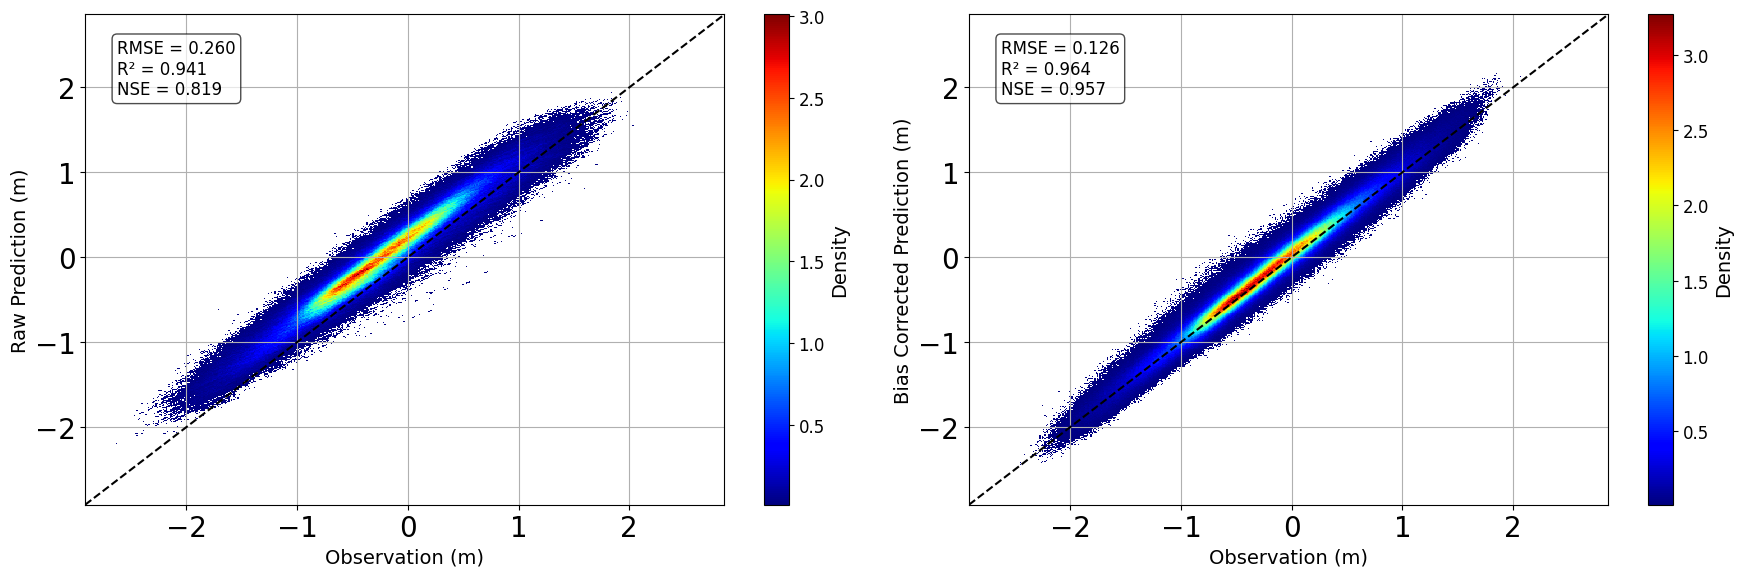

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
# Function to calculate KGE

# Set global font family and size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text elements
    'axes.labelsize': 14,        # Axis label font size
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'legend.fontsize': 12,       # Font size for legend
    'figure.figsize': (16, 6),   # Figure size
    'axes.titlepad': 15,         # Padding for titles
    'axes.grid': True            # Enable grid by default
})


# First subplot (on the right)
# First plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_r

# Plot the line of perfect agreement (y=x)
axes[0].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h2 = axes[0].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h2[3], ax=axes[0], label='Density')

# Set the x and y limits to match the range of a
axes[0].set_xlim(a.min(), a.max())
axes[0].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[0].text(0.05, 0.95, stats_text, transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

axes[0].set_ylabel('Raw Prediction (m)', fontsize=14)
axes[0].set_xlabel('Observation (m)', fontsize=14)


# Second plot: 2D Histogram (Bias Corrected Prediction)
a = general_Test_t
b = general_Test_p


# Plot the line of perfect agreement (y=x)
axes[1].plot([a.min(), a.max()], [a.min(), a.max()], 'k--')

# Create a colormap and set the color for empty areas (value=0) to white
cmap = plt.cm.jet
cmap.set_under('white')

# Plot the 2D histogram
h = axes[1].hist2d(a, b, bins=500, cmap=cmap, density=True, vmin=0.01)

# Add color bar to show the density scale
fig.colorbar(h[3], ax=axes[1], label='Density')

# Set the x and y limits to match the range of a
axes[1].set_xlim(a.min(), a.max())
axes[1].set_ylim(a.min(), a.max())

correlation = np.corrcoef(a, b)[0, 1]**2
rmse = np.sqrt(np.mean((b - a)**2))

nse = he.evaluator(he.nse, b, a)

# Add statistics in a text box at the top-left corner of the first subplot
stats_text = f"RMSE = {rmse:.3f}\nR² = {correlation:.3f}\nNSE = {nse[0]:.3f}"
axes[1].text(0.05, 0.95, stats_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))


axes[1].set_ylabel('Bias Corrected Prediction (m)', fontsize=14)
axes[1].set_xlabel('Observation (m)', fontsize=14)




# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file with 300 DPI
plt.savefig('plot_extreme.png', dpi=300)

# Show the plot
plt.show()


## scatter plots

In [108]:
from sklearn.metrics import r2_score


station_data_p = []  # List to store (ID, value) pairs
station_data_t = []  # List to store (ID, value) pairs
station_data_r = []  # List to store (ID, value) pairs

# Iterate over all stations in the data
for station_id, records in extracted_data_99_9.items():
    for record in records:
        station_data_p.append([station_id, record['Test_P']])  # Store (ID, Test_P)
        station_data_t.append([station_id, record['Test_t']])  # Store (ID, Test_P)
        station_data_r.append([station_id, record['Tests_r']])  # Store (ID, Test_P)

# Convert to a NumPy 2D array
data_array_p_9 = np.array(station_data_p)
data_array_t_9 = np.array(station_data_t)
data_array_r_9 = np.array(station_data_r)

station_data_p = []  # List to store (ID, value) pairs
station_data_t = []  # List to store (ID, value) pairs
station_data_r = []  # List to store (ID, value) pairs

# Iterate over all stations in the data
for station_id, records in extracted_data_99_99.items():
    for record in records:
        station_data_p.append([station_id, record['Test_P']])  # Store (ID, Test_P)
        station_data_t.append([station_id, record['Test_t']])  # Store (ID, Test_P)
        station_data_r.append([station_id, record['Tests_r']])  # Store (ID, Test_P)

# Convert to a NumPy 2D array
data_array_p_99 = np.array(station_data_p)
data_array_t_99 = np.array(station_data_t)
data_array_r_99 = np.array(station_data_r)



# Get unique station IDs
station_ids = np.unique(data_array_p_9[:, 0])  # Extract unique IDs

# Dictionary to store metrics for each station
rmse_per_station_p_99 = {}
rmse_per_station_r_99 = {}
rmse_per_station_p_9 = {}
rmse_per_station_r_9 = {}
rmse_per_station_p_g = {}
rmse_per_station_r_g = {}

corr_per_station_p_99 = {}
corr_per_station_r_99 = {}
corr_per_station_p_9 = {}
corr_per_station_r_9 = {}
corr_per_station_p_g = {}
corr_per_station_r_g = {}


max_per_station_p_99 = {}
max_per_station_r_99 = {}
max_per_station_p_9 = {}
max_per_station_r_9 = {}
max_per_station_p_g = {}
max_per_station_r_g = {}



# Compute standard deviation for each station
for i, station in enumerate(station_ids):
    station_values_p = data_array_p_99[data_array_p_99[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_99[data_array_t_99[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_99[data_array_r_99[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_99[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_99[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_99[station] = r2_score(station_values_t, station_values_p)
    corr_per_station_r_99[station] = r2_score(station_values_t, station_values_r)
    #corr_per_station_p_99[station] = he.evaluator(he.nse, station_values_p, station_values_t)
    #corr_per_station_r_99[station] = he.evaluator(he.nse, station_values_r, station_values_t)
    max_per_station_p_99[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_99[station] = np.max(np.abs(station_values_r-station_values_t))

    station_values_p = data_array_p_9[data_array_p_9[:, 0] == station, 1]  # Extract values for the station
    station_values_t = data_array_t_9[data_array_t_9[:, 0] == station, 1]  # Extract values for the station
    station_values_r = data_array_r_9[data_array_r_9[:, 0] == station, 1]  # Extract values for the station
    rmse_per_station_r_9[station] = np.sqrt(np.mean((station_values_r - station_values_t)**2))
    rmse_per_station_p_9[station] = np.sqrt(np.mean((station_values_p - station_values_t)**2))
    corr_per_station_p_9[station] = r2_score(station_values_t, station_values_p)
    corr_per_station_r_9[station] = r2_score(station_values_t, station_values_r)
    #corr_per_station_p_9[station] = he.evaluator(he.nse, station_values_p, station_values_t)
    #corr_per_station_r_9[station] = he.evaluator(he.nse, station_values_r, station_values_t)
    max_per_station_p_9[station] = np.max(np.abs(station_values_p-station_values_t))
    max_per_station_r_9[station] = np.max(np.abs(station_values_r-station_values_t))  

    Test_r2_station = Test_r2[:,i,:]
    Test_r_station = Test_r2_station[~np.isnan(Test_r2_station)]
    Test_p2_station = Test_p2[:,i,:]
    Test_p_station = Test_p2_station[~np.isnan(Test_p2_station)]
    Test_t2_station = Test_t2[:,i,:]
    Test_t_station = Test_t2_station[~np.isnan(Test_t2_station)]    
    rmse_per_station_r_g[station] = np.sqrt(np.mean((Test_r_station - Test_t_station)**2))
    rmse_per_station_p_g[station] = np.sqrt(np.mean((Test_p_station - Test_t_station)**2))
    corr_per_station_p_g[station] = r2_score(Test_t_station, Test_p_station)
    corr_per_station_r_g[station] = r2_score(Test_t_station, Test_r_station)
    #corr_per_station_p_g[station] = he.evaluator(he.nse, Test_p_station, Test_t_station)
    #corr_per_station_r_g[station] = he.evaluator(he.nse, Test_r_station, Test_t_station)
    max_per_station_p_g[station] = np.max(np.abs(Test_p_station-Test_t_station))
    max_per_station_r_g[station] = np.max(np.abs(Test_r_station-Test_t_station))



1.2009085175469685
1.0331234577983042
1.3145608195572591
1.0567127833604173
1.1819920289663115
1.0958681197414606
0.9870442128945329
0.9235757291321469
0.976011330417206
0.7382292260232457
0.9188947403196248
0.7959155254603758
0.9023065872303677
0.7783766570669878
0.8425607956090995
0.7762372019892315
0.9556959699934269
0.8039758537537494
1.0966951217437726
0.9246233866200959
1.1759706903952107
1.0654020326887301
1.0220269015799879
0.8713749380344007
1.0902847034998215
0.9420212205388615
1.2946922194110506
1.3146964304046982
1.4339409511075931
1.3922509388801168
1.03125398189409
0.9359630294688251
1.7347535287817517
1.6852021515786684
1.239920227622481
1.0895829636807162
1.0963162569316764
1.2401831630654065
1.2517003495761467
1.0811938273862545


<Figure size 1800x1800 with 0 Axes>

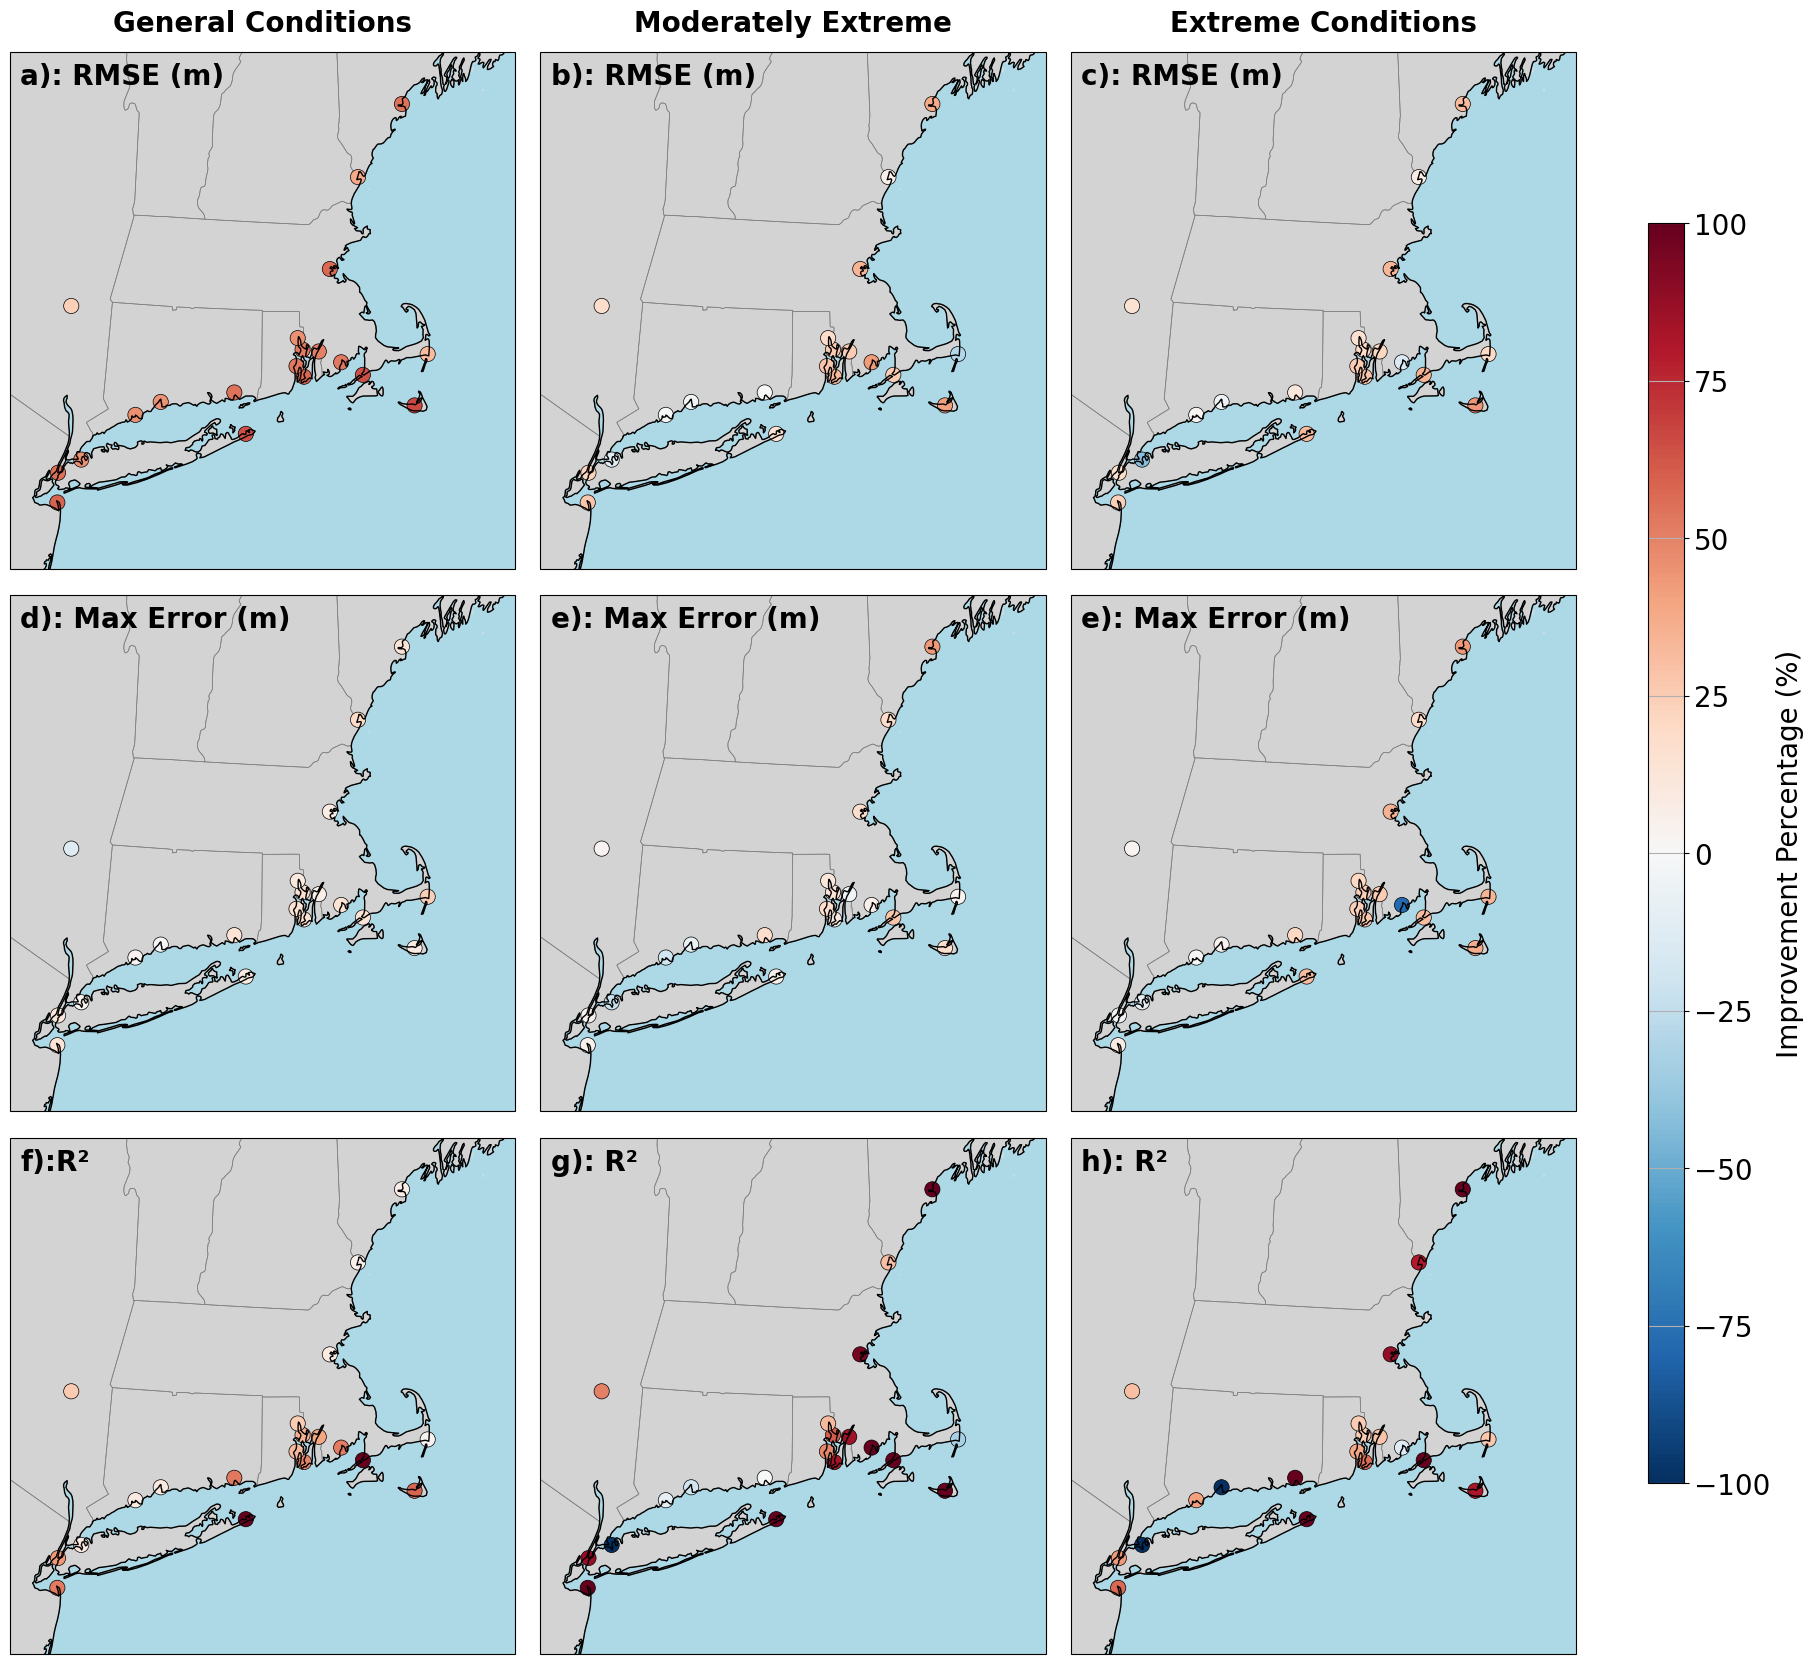

In [111]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import TwoSlopeNorm

# Set up the Plot and Projection ---
fig = plt.figure(figsize=(18, 18))

datasets = ['General Conditions', 'Moderately Extreme', 'Extreme Conditions']

metric_names = ['a): RMSE (m)','b): RMSE (m)','c): RMSE (m)','d): Max Error (m)','e): Max Error (m)','e): Max Error (m)','f):R²','g): R²','h): R²']

# Replace this with your actual latitude and longitude data
COORD_FILE = '/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Data_preparation/stations.csv'
station_coords = pd.read_csv(COORD_FILE)
lons = station_coords['lon']  # Longitude range for continental US
lats = station_coords['lat']   # Latitude range for continental US


rmse_improvement_99_percent = []
rmse_improvement_9_percent = []
rmse_improvement_g_percent = []
max_improvement_99_percent = []
max_improvement_9_percent = []
max_improvement_g_percent = []
corr_improvement_99_percent = []
corr_improvement_9_percent = []
corr_improvement_g_percent = []

for station in station_coords['nos_id']:
    
        rmse_raw_99 = rmse_per_station_r_99.get(station)
        rmse_corrected_99 = rmse_per_station_p_99.get(station)
        rmse_raw_9 = rmse_per_station_r_9.get(station)
        rmse_corrected_9 = rmse_per_station_p_9.get(station)
        rmse_raw_g = rmse_per_station_r_g.get(station)
        rmse_corrected_g = rmse_per_station_p_g.get(station)
        max_raw_99 = max_per_station_r_99.get(station)
        max_corrected_99 = max_per_station_p_99.get(station)
        max_raw_9 = max_per_station_r_9.get(station)
        max_corrected_9 = max_per_station_p_9.get(station)
        max_raw_g = max_per_station_r_g.get(station)
        max_corrected_g = max_per_station_p_g.get(station)
        corr_raw_99 = corr_per_station_r_99.get(station)
        corr_corrected_99 = corr_per_station_p_99.get(station)
        corr_raw_9 = corr_per_station_r_9.get(station)
        corr_corrected_9 = corr_per_station_p_9.get(station)
        corr_raw_g = corr_per_station_r_g.get(station)
        corr_corrected_g = corr_per_station_p_g.get(station)    
            
        # Percentage Improvement: (Raw Error - Corrected Error) / Raw Error * 100
        rmse_improvement_99_percent.append(((rmse_raw_99 - rmse_corrected_99) / rmse_raw_99) * 100)
        rmse_improvement_9_percent.append(((rmse_raw_9 - rmse_corrected_9) / rmse_raw_9) * 100)
        rmse_improvement_g_percent.append(((rmse_raw_g - rmse_corrected_g) / rmse_raw_g) * 100)
        max_improvement_99_percent.append(((max_raw_99 - max_corrected_99) / max_raw_99) * 100)
        max_improvement_9_percent.append(((max_raw_9 - max_corrected_9) / max_raw_9) * 100)
        max_improvement_g_percent.append(((max_raw_g - max_corrected_g) / max_raw_g) * 100)
        corr_improvement_99_percent.append(((corr_corrected_99 - corr_raw_99) / abs(corr_raw_99)) * 100)
        corr_improvement_9_percent.append(((corr_corrected_9 - corr_raw_9) / abs(corr_raw_9)) * 100)
        corr_improvement_g_percent.append(((corr_corrected_g - corr_raw_g) / abs(corr_raw_g)) * 100)



# --- 4. Add the new column to the DataFrame ---
station_coords['rmse_improvement_g_percent'] = rmse_improvement_g_percent
station_coords['rmse_improvement_9_percent'] = rmse_improvement_9_percent
station_coords['rmse_improvement_99_percent'] = rmse_improvement_99_percent
station_coords['max_improvement_g_percent'] = max_improvement_g_percent
station_coords['max_improvement_9_percent'] = max_improvement_9_percent
station_coords['max_improvement_99_percent'] = max_improvement_99_percent
station_coords['corr_improvement_g_percent'] = corr_improvement_g_percent
station_coords['corr_improvement_9_percent'] = corr_improvement_9_percent
station_coords['corr_improvement_99_percent'] = corr_improvement_99_percent

# Group metrics
Column_name = ['rmse_improvement_g_percent', 'rmse_improvement_9_percent', 'rmse_improvement_99_percent',
               'max_improvement_g_percent', 'max_improvement_9_percent', 'max_improvement_99_percent',
               'corr_improvement_g_percent', 'corr_improvement_9_percent', 'corr_improvement_99_percent']


# 1. Create the figure and a 3x3 grid of subplots (9 total)
#    Set the figure size to 18x18 inches.
fig, axes = plt.subplots(
    nrows=3, ncols=3,
    figsize=(18, 18),
    subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-70, central_latitude=42)}
)

# Flatten the 3x3 array of axes into a 1D array for easier iteration
axes_flat = axes.flatten()

# --- 3. Define Plotting Constants ---
# Use the plotting parameters from your original code
MAP_EXTENT = [-74.5, -69, 40, 44]
COLORMAP = 'RdBu_r'
TRANSFORM_CRS = ccrs.PlateCarree()


# --- 4. Loop Through Subplots and Plot (MODIFIED) ---

# Initialize a variable to store the last scatter object for the colorbar
last_scatter = None

# This ensures all subplots use the same color scale
v_min = station_coords[Column_name].min().min()
v_max = station_coords[Column_name].max().max()

# Create the TwoSlopeNorm centered at zero
# This forces the value 0 to be the center (white) of the RdBu_r colormap
diverging_norm = TwoSlopeNorm(vmin=-100, vcenter=0., vmax=100)

for i, ax in enumerate(axes_flat):
    # Set the extent for the current subplot
    ax.set_extent(MAP_EXTENT, crs=TRANSFORM_CRS)

    # Add Map Features
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.8)
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray', zorder=0)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

    # Plot the Points
    scatter_plot = ax.scatter(lons, lats,
               c=station_coords[Column_name[i]],
               cmap=COLORMAP,
               norm=diverging_norm,  # <-- APPLY THE NORM HERE
               alpha=1.0,           # Full opacity
               marker='o',
               s=120,
               edgecolor='black',
               linewidth=0.5,
               transform=TRANSFORM_CRS)
    
    # Keep track of the scatter object (used for the colorbar)
    last_scatter = scatter_plot

    ax.text(
        0.02, 0.98, 
        metric_names[i], 
        transform=ax.transAxes, 
        fontsize=20, 
        verticalalignment='top', 
        fontweight='bold', 
    )
    
    if i < 3:
        ax.set_title(datasets[i], fontsize=20, fontweight='bold', pad=15)
        
    # Optional: Add a title to each subplot
    #ax.set_title(f'Map {i+1}', fontsize=12)


# --- 5. Add a Single, Shared Colorbar ---

# Tighten the layout before adding the colorbar
plt.subplots_adjust(
    left=0.05,    # Left margin
    right=0.92,   # Right margin (reserving space for colorbar)
    bottom=0.05,  # Bottom margin
    top=0.95,     # Top margin (reserving space for suptitle)
    hspace=0.015,  # **Vertical space between subplots (rows)**
    wspace=0.05   # **Horizontal space between subplots (columns)**
)

# Create the colorbar using the last scatter object
if last_scatter:
    cbar_ax = fig.add_axes([0.96, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
    cbar = fig.colorbar(
        last_scatter,
        cax=cbar_ax,
        orientation='vertical'
    )
    cbar.ax.tick_params(labelsize=20) # Set the desired font size 
    cbar.set_label('Improvement Percentage (%)', fontsize=20)

plt.savefig('us_points_map_improvement2.png',dpi=1200,  bbox_inches='tight')
plt.show()


/tmp/ipykernel_4421/3220531559.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])


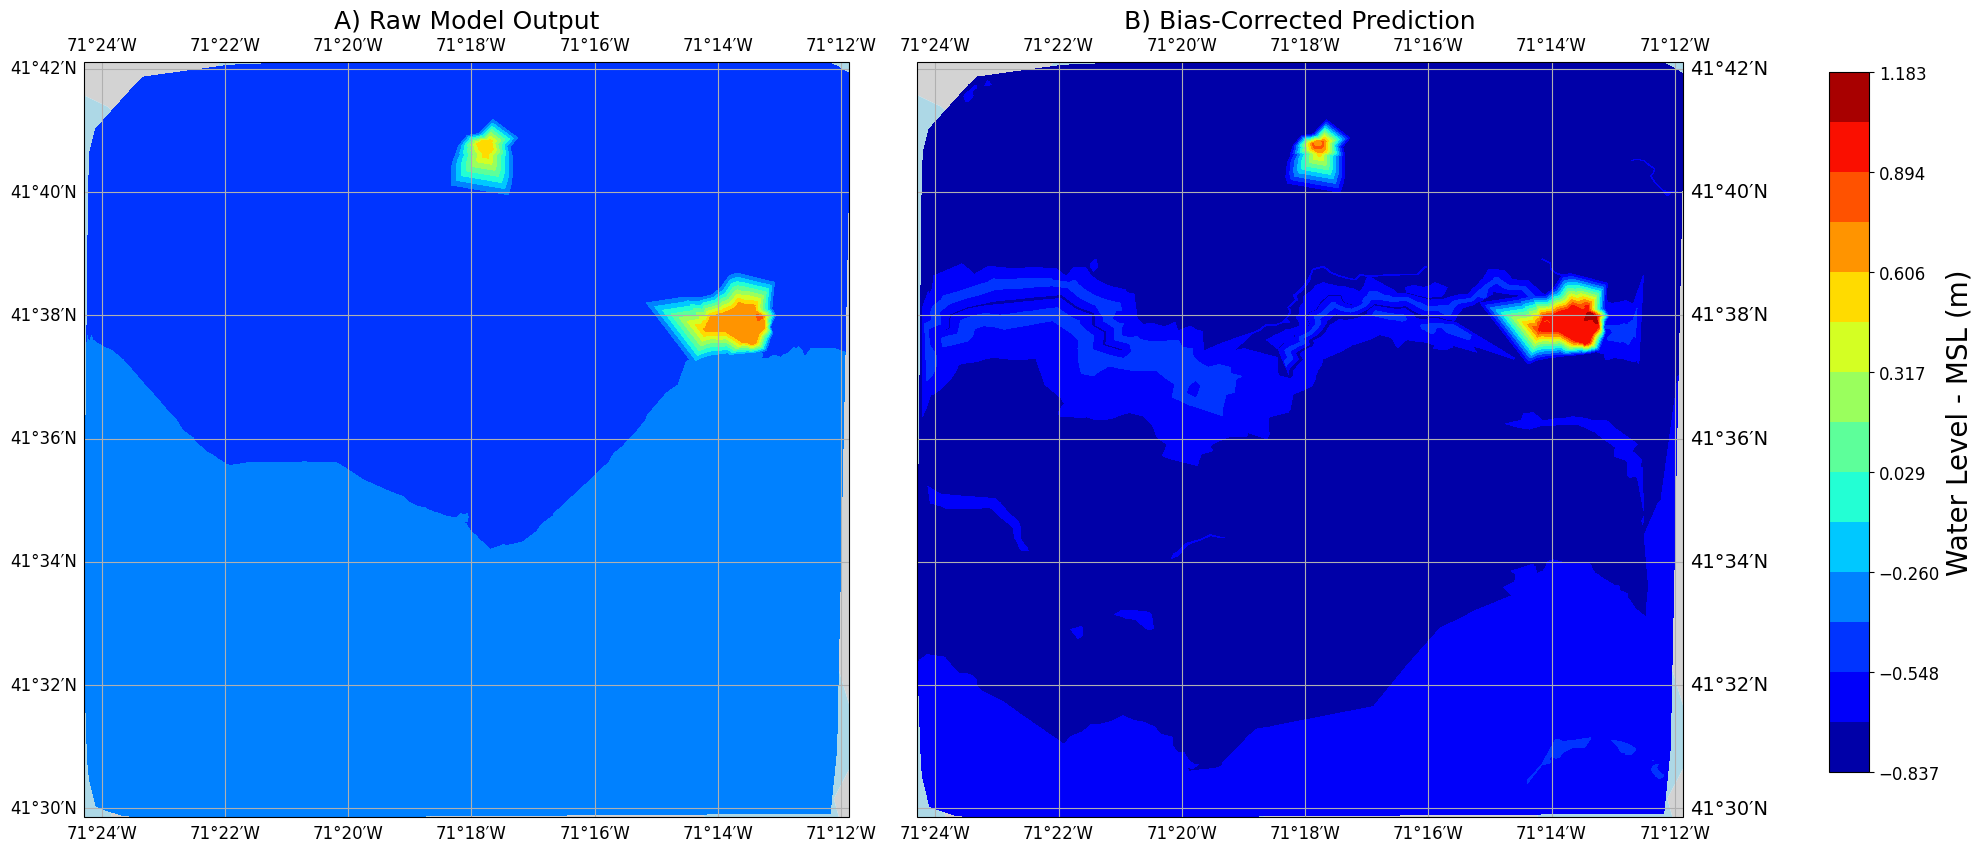

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# --- 0. Set Larger Global Font Sizes ---
# Use Matplotlib's rcParams to set a larger default font size
plt.rcParams.update({
    'font.size': 14,             # Default font size for text
    'axes.titlesize': 18,        # Font size for subplot titles
    'axes.labelsize': 20,        # Font size for axis labels (and colorbar label)
    'xtick.labelsize': 12,       # Font size for x-tick labels
    'ytick.labelsize': 12,       # Font size for y-tick labels
    'figure.titlesize': 20       # Font size for the overall figure title
})


# --- 1. Configuration and Data Loading (Done Once) ---
cycle = 650
time_step = 0
water_level_units = 'Water Level - MSL (m)'

# Define the file path prefix for cleaner code
file_path_prefix = '/lustre/gpu-lustre/code/NeurOCAST_BiasCorrection_dev/NeurOCAST_BiasCorrection/example/Model_training'

# Load both datasets
spatial_p = np.load(f'{file_path_prefix}/spatial_prediction_utc_{cycle}.npy')
spatial_r = np.load(f'{file_path_prefix}/spatial_raw_utc_{cycle}.npy')

# Extract data for the specified time step
water_level_pred = spatial_p[:, time_step]
water_level_raw = spatial_r[:, time_step]

# Load coordinates 
lon_file = np.load(f'{file_path_prefix}/spatial_lon_utc_{cycle}.npy')
lat_file = np.load(f'{file_path_prefix}/spatial_lat_utc_{cycle}.npy')
lon = lon_file[:, time_step]
lat = lat_file[:, time_step]

triang = tri.Triangulation(lon, lat)

# Determine a single, common color scale (vmin/vmax)
vmin = min(water_level_pred.min(), water_level_raw.min())
vmax = max(water_level_pred.max(), water_level_raw.max())

levels = np.linspace(vmin, vmax, 15)


proj = ccrs.PlateCarree()
extent = [lon.min(), lon.max(), lat.min(), lat.max()]

fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    figsize=(20, 10), # Increase figure size to accommodate larger text
    subplot_kw={'projection': proj},
    sharex=True, sharey=True
)


# Plotting Function ---

def plot_water_level(ax, data, title, triang, levels, proj):

    ax.set_extent(extent, crs=proj)

    # Add map features
    ax.coastlines(resolution='110m', color='black', linewidth=1.5) # Thicker lines
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
    
    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    
    # Ensure gridline labels use the specified larger font size
    gl.xlabels_top = False
    if ax == ax2:
        gl.left_labels = False # No Y-labels on the right plot
        # Set x and y tick label size explicitly for Cartopy gridlines
        gl.xlabel_style = {'size': plt.rcParams['xtick.labelsize']}
    else:
        gl.right_labels = False # No Y-labels on the left plot
        gl.xlabel_style = {'size': plt.rcParams['xtick.labelsize']}
        gl.ylabel_style = {'size': plt.rcParams['ytick.labelsize']} # Only Y-labels on the left
        
    # Use tricontourf
    contour = ax.tricontourf(
        triang,
        data,
        levels=levels,
        cmap='jet',
        vmin=vmin,
        vmax=vmax,
        transform=proj
    )
    # Subplot title size is handled by 'axes.titlesize' in rcParams
    ax.set_title(title) 
    return contour

# Generate Plots ---
contour_raw = plot_water_level(
    ax1, 
    water_level_raw, 
    'A) Raw Model Output', 
    triang, 
    levels, 
    proj
)

contour_pred = plot_water_level(
    ax2, 
    water_level_pred, 
    'B) Bias-Corrected Prediction', 
    triang, 
    levels, 
    proj
)

# Finalize Colorbar (Dedicated Axis for Colorbar) ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 

cbar = fig.colorbar(
    contour_pred, 
    cax=cbar_ax, 
    orientation='vertical'
)
# Colorbar label size is handled by 'axes.labelsize' in rcParams
cbar.set_label(f'{water_level_units}') 

# Set tick label size for the colorbar explicitly
cbar.ax.tick_params(labelsize=plt.rcParams['ytick.labelsize'])


plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])
plt.savefig(f'spatial_map{cycle}3.png',dpi=1200,  bbox_inches='tight')

plt.show()

In [17]:
np.min(lat)

np.float64(41.4976558171)

In [18]:
np.max(lat)

np.float64(41.8711722469)